
      *** AMES HOUSE SALEPRICE PREDICTION MACHINE LEARNING MULTI LINEAR MODEL ***


# PROBLEM STATEMENT

Based on the AMES housing sales price data, we have to create a multi linear regression model to predict the sales price. The prediction can help the general public and real estate agents, who are looking to buy or sell houses. This model will help the customer in predicting the saleprice. The model is evaluated using Kaggle RMSE and Adjusted R squared.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
sns.set_style('darkgrid')
%matplotlib inline

# DATA EXPLORATION AND CLEANING

In [2]:
# sets the maximum viewable column to 999
pd.set_option('display.max_columns',999)

In [3]:
# Reading the csv file as pandas dataframe
df1 = pd.read_csv("./datasets/train.csv")
df1.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

In [4]:
# Reading the csv file as pandas dataframe
df2 = pd.read_csv("./datasets/test.csv")
df2.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0  2658  902301120          190        RM          69.0      9142   Pave   
1  2718  905108090           90        RL           NaN      9662   Pave   
2  2414  528218130           60        RL          58.0     17104   Pave   
3  1989  902207150           30        RM          60.0      8520   Pave   
4   625  535105100           20        RL           NaN      9500   Pave   

  Alley Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0  Grvl       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
1   NaN       IR1          Lvl    AllPub     Inside        Gtl       Sawyer   
2   NaN       IR1          Lvl    AllPub     Inside        Gtl      Gilbert   
3   NaN       Reg          Lvl    AllPub     Inside        Gtl      OldTown   
4   NaN       IR1          Lvl    AllPub     Inside        Gtl        NAmes   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        Norm        Norm    2fmCon      2Story             6             8   
1        Norm        Norm    Duplex      1Story             5             4   
2        Norm        Norm      1Fam      2Story             7             5   
3        Norm        Norm      1Fam      1Story             5             6   
4        Norm        Norm      1Fam      1Story             6             5   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1910            1950      Gable   CompShg      AsbShng      AsbShng   
1        1977            1977      Gable   CompShg      Plywood      Plywood   
2        2006            2006      Gable   CompShg      VinylSd      VinylSd   
3        1923            2006      Gable   CompShg      Wd Sdng      Wd Sdng   
4        1963            1963      Gable   CompShg      Plywood      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0         None           0.0         TA         Fa      Stone        Fa   
1         None           0.0         TA         TA     CBlock        Gd   
2         None           0.0         Gd         TA      PConc        Gd   
3         None           0.0         Gd         TA     CBlock        TA   
4      BrkFace         247.0         TA         TA     CBlock        Gd   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            Unf             0            Unf   
1        TA            No            Unf             0            Unf   
2        Gd            Av            GLQ           554            Unf   
3        TA            No            Unf             0            Unf   
4        TA            No            BLQ           609            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0             0         1020           1020    GasA         Gd           N   
1             0         1967           1967    GasA         TA           Y   
2             0          100            654    GasA         Ex           Y   
3             0          968            968    GasA         TA           Y   
4             0          785           1394    GasA         Gd           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      FuseP         908        1020                0         1928   
1      SBrkr        1967           0                0         1967   
2      SBrkr         664         832                0         1496   
3      SBrkr         968           0                0          968   
4      SBrkr        1394           0                0         1394   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0               0               0          2          0              4   
1               0               0          2          0              6   
2               1               0          2          1              3   
3               0               0        

In [5]:
# concatinating test and train set together to impute null values and to do one hot coding
df1['train']=1
df2['train']=0
df=pd.concat([df1, df2], ignore_index=True,axis=0,sort=True)
df.tail()

1st Flr SF  2nd Flr SF  3Ssn Porch Alley  Bedroom AbvGr Bldg Type  \
2925        1084         793           0   NaN              4      1Fam   
2926        1104         884           0   NaN              4      1Fam   
2927        1211           0           0   NaN              3      1Fam   
2928         864           0           0   NaN              3      1Fam   
2929         925           0           0   NaN              3      1Fam   

     Bsmt Cond Bsmt Exposure  Bsmt Full Bath  Bsmt Half Bath Bsmt Qual  \
2925        TA            No             1.0             0.0        TA   
2926        TA            No             0.0             0.0        TA   
2927        TA            No             0.0             0.0        TA   
2928        TA            No             0.0             0.0        TA   
2929        TA            No             1.0             0.0        TA   

      Bsmt Unf SF  BsmtFin SF 1  BsmtFin SF 2 BsmtFin Type 1 BsmtFin Type 2  \
2925          0.0         931.0         153.0            ALQ            LwQ   
2926        529.0         575.0           0.0            BLQ            Unf   
2927        210.0         250.0         492.0            BLQ            LwQ   
2928        248.0         616.0           0.0            ALQ            Unf   
2929        130.0         793.0           0.0            BLQ            Unf   

     Central Air Condition 1 Condition 2 Electrical  Enclosed Porch  \
2925           Y        PosN        Norm      SBrkr               0   
2926           Y        Norm        Norm      SBrkr               0   
2927           Y       Feedr        Norm      SBrkr               0   
2928           Y        Norm        Norm      SBrkr               0   
2929           Y        Norm        Norm      SBrkr               0   

     Exter Cond Exter Qual Exterior 1st Exterior 2nd  Fence Fireplace Qu  \
2925         TA         TA      HdBoard      HdBoard    NaN           TA   
2926         Gd         Gd      VinylSd      VinylSd  MnPrv           Gd   
2927         TA         TA      HdBoard      HdBoard    NaN           TA   
2928         TA         TA      HdBoard      HdBoard   GdWo          NaN   
2929         Gd         TA      MetalSd      MetalSd   GdWo           TA   

      Fireplaces Foundation  Full Bath Functional  Garage Area  Garage Cars  \
2925           1     CBlock          2        Typ        488.0          2.0   
2926           1     CBlock          2        Typ        480.0          2.0   
2927           1     CBlock          1        Typ        322.0          1.0   
2928           0      PConc          1        Typ        528.0          2.0   
2929           2     CBlock          1        Typ        390.0          1.0   

     Garage Cond Garage Finish Garage Qual Garage Type  Garage Yr Blt  \
2925          TA           Unf          TA      Attchd         1974.0   
2926          TA           RFn          TA      Attchd         1966.0   
2927          TA           Unf          TA      Attchd         1968.0   
2928          TA           Unf          TA      Detchd         1974.0   
2929          TA           Unf          TA      Attchd         1955.0   

      Gr Liv Area  Half Bath Heating Heating QC House Style    Id  \
2925         1877          1    GasA         TA      2Story  1662   
2926         1988          1    GasA         Ex      2Story  1234   
2927         1211          0    GasA         Ex      1Story  1373   
2928          864          0    GasA         TA      1Story  1672   
2929          925          0    GasA         TA      1Story  1939   

      Kitchen AbvGr Kitchen Qual Land Contour Land Slope  Lot Area Lot Config  \
2925              1           TA          Lvl        Gtl      8000     Inside   
2926              1           Gd          Lvl        Gtl     14670     Inside   
2927              1           TA          Lvl        Gtl      8250     Inside   
2928              1           TA          Lvl        Gtl      9000        FR2   
2929             

In [6]:
# Changing column name to lower case and inserting _ for space.
df.columns = [x.lower().replace(' ','_') for x in df.columns]
df.head()

1st_flr_sf  2nd_flr_sf  3ssn_porch alley  bedroom_abvgr bldg_type  \
0         725         754           0   NaN              3      1Fam   
1         913        1209           0   NaN              4      1Fam   
2        1057           0           0   NaN              3      1Fam   
3         744         700           0   NaN              3      1Fam   
4         831         614           0   NaN              3      1Fam   

  bsmt_cond bsmt_exposure  bsmt_full_bath  bsmt_half_bath bsmt_qual  \
0        TA            No             0.0             0.0        TA   
1        TA            No             1.0             0.0        Gd   
2        TA            No             1.0             0.0        TA   
3        TA            No             0.0             0.0        Gd   
4        Gd            No             0.0             0.0        Fa   

   bsmt_unf_sf  bsmtfin_sf_1  bsmtfin_sf_2 bsmtfin_type_1 bsmtfin_type_2  \
0        192.0         533.0           0.0            GLQ            Unf   
1        276.0         637.0           0.0            GLQ            Unf   
2        326.0         731.0           0.0            GLQ            Unf   
3        384.0           0.0           0.0            Unf            Unf   
4        676.0           0.0           0.0            Unf            Unf   

  central_air condition_1 condition_2 electrical  enclosed_porch exter_cond  \
0           Y        RRAe        Norm      SBrkr               0         TA   
1           Y        Norm        Norm      SBrkr               0         TA   
2           Y        Norm        Norm      SBrkr               0         Gd   
3           Y        Norm        Norm      SBrkr               0         TA   
4           Y        Norm        Norm      SBrkr               0         TA   

  exter_qual exterior_1st exterior_2nd fence fireplace_qu  fireplaces  \
0         Gd      HdBoard      Plywood   NaN          NaN           0   
1         Gd      VinylSd      VinylSd   NaN           TA           1   
2         TA      VinylSd      VinylSd   NaN          NaN           0   
3         TA      VinylSd      VinylSd   NaN          NaN           0   
4         TA      Wd Sdng      Plywood   NaN          NaN           0   

  foundation  full_bath functional  garage_area  garage_cars garage_cond  \
0     CBlock          2        Typ        475.0          2.0          TA   
1      PConc          2        Typ        559.0          2.0          TA   
2     CBlock          1        Typ        246.0          1.0          TA   
3      PConc          2        Typ        400.0          2.0          TA   
4      PConc          2        Typ        484.0          2.0          TA   

  garage_finish garage_qual garage_type  garage_yr_blt  gr_liv_area  \
0           RFn          TA      Attchd         1976.0         1479   
1           RFn          TA      Attchd         1997.0         2122   
2           Unf          TA      Detchd         1953.0         1057   
3           Fin          TA     BuiltIn         2007.0         1444   
4           Unf          TA      Detchd         1957.0         1445   

   half_bath heating heating_qc house_style   id  kitchen_abvgr kitchen_qual  \
0          1    GasA         Ex      2Story  109              1           Gd   
1          1    GasA         Ex      2Story  544              1           Gd   
2          0    GasA         TA      1Story  153              1           Gd   
3          1    GasA         Gd      2Story  318              1           TA   
4          0    GasA         TA      1.5Fin  255              1           TA   

  land_contour land_slope  lot_area lot_config  lot_frontage lot_shape  \
0          Lvl        Gtl     13517    CulDSac           NaN       IR1   
1          Lvl        Gtl     11492    CulDSac          43.0       IR1   
2          Lvl        Gtl      7922     Inside          68.0       Reg   
3          Lvl        Gtl      9802     Inside          73.0       Reg   
4          Lvl        Gtl     14235  

In [7]:
# finding null values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
1st_flr_sf         2930 non-null int64
2nd_flr_sf         2930 non-null int64
3ssn_porch         2930 non-null int64
alley              198 non-null object
bedroom_abvgr      2930 non-null int64
bldg_type          2930 non-null object
bsmt_cond          2850 non-null object
bsmt_exposure      2847 non-null object
bsmt_full_bath     2928 non-null float64
bsmt_half_bath     2928 non-null float64
bsmt_qual          2850 non-null object
bsmt_unf_sf        2929 non-null float64
bsmtfin_sf_1       2929 non-null float64
bsmtfin_sf_2       2929 non-null float64
bsmtfin_type_1     2850 non-null object
bsmtfin_type_2     2849 non-null object
central_air        2930 non-null object
condition_1        2930 non-null object
condition_2        2930 non-null object
electrical         2929 non-null object
enclosed_porch     2930 non-null int64
exter_cond         2930 non-null object
exter_qual    

In [8]:
# Setting the datatype to String
df['ms_subclass']=df['ms_subclass'].astype('str')
# type of id is changed and to be used during Kaggle result submission along with the sales prediction.
df['id']=df['id'].astype('str')


In [9]:
# finding the null values in each column

df.isnull().sum().sort_values(ascending = False).head(30)

pool_qc           2917
misc_feature      2824
alley             2732
fence             2358
fireplace_qu      1422
saleprice          879
lot_frontage       490
garage_yr_blt      159
garage_qual        159
garage_cond        159
garage_finish      159
garage_type        157
bsmt_exposure       83
bsmtfin_type_2      81
bsmt_cond           80
bsmt_qual           80
bsmtfin_type_1      80
mas_vnr_area        23
mas_vnr_type        23
bsmt_full_bath       2
bsmt_half_bath       2
electrical           1
garage_area          1
bsmtfin_sf_2         1
bsmt_unf_sf          1
total_bsmt_sf        1
garage_cars          1
bsmtfin_sf_1         1
functional           0
full_bath            0
dtype: int64

In [10]:
# Checking the null value in garage_area
df[df['garage_area'].isnull()]

1st_flr_sf  2nd_flr_sf  3ssn_porch alley  bedroom_abvgr bldg_type  \
1712         942         886           0   NaN              3      1Fam   

     bsmt_cond bsmt_exposure  bsmt_full_bath  bsmt_half_bath bsmt_qual  \
1712        TA            No             0.0             0.0        Gd   

      bsmt_unf_sf  bsmtfin_sf_1  bsmtfin_sf_2 bsmtfin_type_1 bsmtfin_type_2  \
1712        311.0         548.0           0.0            ALQ            Unf   

     central_air condition_1 condition_2 electrical  enclosed_porch  \
1712           Y        Norm        Norm      SBrkr             212   

     exter_cond exter_qual exterior_1st exterior_2nd  fence fireplace_qu  \
1712         TA         TA      Wd Sdng      Plywood  MnPrv          NaN   

      fireplaces foundation  full_bath functional  garage_area  garage_cars  \
1712           0     BrkTil          2        Typ          NaN          NaN   

     garage_cond garage_finish garage_qual garage_type  garage_yr_blt  \
1712         NaN           NaN         NaN      Detchd            NaN   

      gr_liv_area  half_bath heating heating_qc house_style    id  \
1712         1828          0    GasA         Ex      2Story  2237   

      kitchen_abvgr kitchen_qual land_contour land_slope  lot_area lot_config  \
1712              1           Gd          Lvl        Gtl      9060     Inside   

      lot_frontage lot_shape  low_qual_fin_sf ms_subclass ms_zoning  \
1712          50.0       Reg                0          70        RM   

      mas_vnr_area mas_vnr_type misc_feature  misc_val  mo_sold neighborhood  \
1712           0.0         None          NaN         0        3       IDOTRR   

      open_porch_sf  overall_cond  overall_qual        pid paved_drive  \
1712              0             6             5  910201180           Y   

      pool_area pool_qc roof_matl roof_style sale_type  saleprice  \
1712          0     NaN   CompShg      Gable       WD    150909.0   

      screen_porch street  totrms_abvgrd  total_bsmt_sf utilities  \
1712             0   Pave              6          859.0    AllPub   

      wood_deck_sf  year_built  year_remod/add  yr_sold  train  
1712           174        1923            1999     2007      1

We can see the null value for both garage_cars and garage_area in the above row.

In [11]:
# null value at garage area and garage car is replaced to 0 as some home maynot have a car.
df['garage_area']=df['garage_area'].fillna(0)
df['garage_cars']=df['garage_cars'].fillna(0)

In [12]:
# Missing value in lot frontage is changed to median as all home will have a lot frontage.

df['lot_frontage'].fillna(df1['Lot Frontage'].median(),inplace = True)


In [13]:
# Checking for null values in basement.
df[df['total_bsmt_sf'].isnull()]


1st_flr_sf  2nd_flr_sf  3ssn_porch alley  bedroom_abvgr bldg_type  \
1327         896           0           0   NaN              2      1Fam   

     bsmt_cond bsmt_exposure  bsmt_full_bath  bsmt_half_bath bsmt_qual  \
1327       NaN           NaN             NaN             NaN       NaN   

      bsmt_unf_sf  bsmtfin_sf_1  bsmtfin_sf_2 bsmtfin_type_1 bsmtfin_type_2  \
1327          NaN           NaN           NaN            NaN            NaN   

     central_air condition_1 condition_2 electrical  enclosed_porch  \
1327           Y       Feedr        Norm      FuseA               0   

     exter_cond exter_qual exterior_1st exterior_2nd  fence fireplace_qu  \
1327         TA         TA      MetalSd       CBlock  MnPrv          NaN   

      fireplaces foundation  full_bath functional  garage_area  garage_cars  \
1327           0      PConc          1        Typ        280.0          1.0   

     garage_cond garage_finish garage_qual garage_type  garage_yr_blt  \
1327          TA           Unf          TA      Detchd         1946.0   

      gr_liv_area  half_bath heating heating_qc house_style    id  \
1327          896          0    GasA         TA      1Story  1342   

      kitchen_abvgr kitchen_qual land_contour land_slope  lot_area lot_config  \
1327              1           TA          Lvl        Gtl      5940        FR3   

      lot_frontage lot_shape  low_qual_fin_sf ms_subclass ms_zoning  \
1327          99.0       IR1                0          20        RM   

      mas_vnr_area mas_vnr_type misc_feature  misc_val  mo_sold neighborhood  \
1327           0.0         None          NaN         0        4      BrkSide   

      open_porch_sf  overall_cond  overall_qual        pid paved_drive  \
1327              0             7             4  903230120           Y   

      pool_area pool_qc roof_matl roof_style sale_type  saleprice  \
1327          0     NaN   CompShg      Gable     ConLD    79000.0   

      screen_porch street  totrms_abvgrd  total_bsmt_sf utilities  \
1327             0   Pave              4            NaN    AllPub   

      wood_deck_sf  year_built  year_remod/add  yr_sold  train  
1327             0        1946            1950     2008      1

In [14]:
# Some home may not have basement, So all nan values in basement is changed to 0.
df['bsmt_full_bath'].fillna(0,inplace = True)
df['bsmt_half_bath'].fillna(0,inplace = True)
df['bsmt_unf_sf'].fillna(0,inplace = True)
df['bsmtfin_sf_2'].fillna(0,inplace = True)
df['bsmtfin_sf_1'].fillna(0,inplace = True)
df['total_bsmt_sf'].fillna(0,inplace = True)

In [15]:
# Some home may not have mas_vnr_area, so changed it to 0.
df['mas_vnr_area'].fillna(0,inplace = True)


In [16]:
# Some of the house doesn't have a garage and so garage year built is changed to 0
df['garage_yr_blt'].fillna(0,inplace = True)


In [17]:
# Statistical datas of each columns are investigated
df_desc=df.describe().T

In [18]:
# added this lines to get an idea about outliers
df_desc['mean-3std']=df_desc['mean']-3*df_desc['std']
df_desc['mean+3std']=df_desc['mean']+3*df_desc['std']
df_desc

count          mean           std          min  \
1st_flr_sf       2930.0  1.159558e+03  3.918909e+02        334.0   
2nd_flr_sf       2930.0  3.354560e+02  4.283957e+02          0.0   
3ssn_porch       2930.0  2.592491e+00  2.514133e+01          0.0   
bedroom_abvgr    2930.0  2.854266e+00  8.277311e-01          0.0   
bsmt_full_bath   2930.0  4.310580e-01  5.247620e-01          0.0   
bsmt_half_bath   2930.0  6.109215e-02  2.451750e-01          0.0   
bsmt_unf_sf      2930.0  5.590717e+02  4.395406e+02          0.0   
bsmtfin_sf_1     2930.0  4.424785e+02  4.555865e+02          0.0   
bsmtfin_sf_2     2930.0  4.970546e+01  1.691421e+02          0.0   
enclosed_porch   2930.0  2.301160e+01  6.413906e+01          0.0   
fireplaces       2930.0  5.993174e-01  6.479209e-01          0.0   
full_bath        2930.0  1.566553e+00  5.529406e-01          0.0   
garage_area      2930.0  4.726584e+02  2.151872e+02          0.0   
garage_cars      2930.0  1.766212e+00  7.611367e-01          0.0   
garage_yr_blt    2930.0  1.870787e+03  4.488941e+02          0.0   
gr_liv_area      2930.0  1.499690e+03  5.055089e+02        334.0   
half_bath        2930.0  3.795222e-01  5.026293e-01          0.0   
kitchen_abvgr    2930.0  1.044369e+00  2.140762e-01          0.0   
lot_area         2930.0  1.014792e+04  7.880018e+03       1300.0   
lot_frontage     2930.0  6.901980e+01  2.132642e+01         21.0   
low_qual_fin_sf  2930.0  4.676792e+00  4.631051e+01          0.0   
mas_vnr_area     2930.0  1.010969e+02  1.786345e+02          0.0   
misc_val         2930.0  5.063515e+01  5.663443e+02          0.0   
mo_sold          2930.0  6.216041e+00  2.714492e+00          1.0   
open_porch_sf    2930.0  4.753345e+01  6.748340e+01          0.0   
overall_cond     2930.0  5.563140e+00  1.111537e+00          1.0   
overall_qual     2930.0  6.094881e+00  1.411026e+00          1.0   
pid              2930.0  7.144645e+08  1.887308e+08  526301100.0   
pool_area        2930.0  2.243345e+00  3.559718e+01          0.0   
saleprice        2051.0  1.814697e+05  7.925866e+04      12789.0   
screen_porch     2930.0  1.600205e+01  5.608737e+01          0.0   
totrms_abvgrd    2930.0  6.443003e+00  1.572964e+00          2.0   
total_bsmt_sf    2930.0  1.051256e+03  4.409680e+02          0.0   
wood_deck_sf     2930.0  9.375188e+01  1.263616e+02          0.0   
year_built       2930.0  1.971356e+03  3.024536e+01       1872.0   
year_remod/add   2930.0  1.984267e+03  2.086029e+01       1950.0   
yr_sold          2930.0  2.007790e+03  1.316613e+00       2006.0   
train            2930.0  7.000000e-01  4.583358e-01          0.0   

                          25%          50%           75%           max  \
1st_flr_sf       8.762500e+02       1084.0  1.384000e+03  5.095000e+03   
2nd_flr_sf       0.000000e+00          0.0  7.037500e+02  2.065000e+03   
3ssn_porch       0.000000e+00          0.0  0.000000e+00  5.080000e+02   
bedroom_abvgr    2.000000e+00          3.0  3.000000e+00  8.000000e+00   
bsmt_full_bath   0.000000e+00          0.0  1.000000e+00  3.000000e+00   
bsmt_half_bath   0.000000e+00          0.0  0.000000e+00  2.000000e+00   
bsmt_unf_sf      2.190000e+02        465.5  8.017500e+02  2.336000e+03   
bsmtfin_sf_1     0.000000e+00        370.0  7.340000e+02  5.644000e+03   
bsmtfin_sf_2     0.000000e+00          0.0  0.000000e+00  1.526000e+03   
enclosed_porch   0.000000e+00          0.0  0.000000e+00  1.012000e+03   
fireplaces       0.000000e+00          1.0  1.000000e+00  4.000000e+00   
full_bath        1.000000e+00          2.0  2.000000e+00  4.000000e+00   
garage_area      3.200000e+02        480.0  5.760000e+02  1.488000e+03   
garage_cars      1.000000e+00          2.0  2.000000e+00  5.000000e+00   
garage_yr_blt    1.957000e+03       1977.0  2.001000e+03  2.207000e+03   
gr_liv_area      1.126000e+03       1442.0  1.742750e+03  5.642000e+03   
half_bath        0.000000e+00          0.0  1.000000e+00  2.000000e+00   
kitchen_abvgr    1.000000e+00    

In [19]:
# Identified the outlier in garage year built to be a data entry error and change it from 2207 to 2007.
df[df['garage_yr_blt']==2207.0]

1st_flr_sf  2nd_flr_sf  3ssn_porch alley  bedroom_abvgr bldg_type  \
1699        1564           0           0   NaN              2      1Fam   

     bsmt_cond bsmt_exposure  bsmt_full_bath  bsmt_half_bath bsmt_qual  \
1699        TA            Av             0.0             0.0        Gd   

      bsmt_unf_sf  bsmtfin_sf_1  bsmtfin_sf_2 bsmtfin_type_1 bsmtfin_type_2  \
1699        963.0         583.0           0.0            GLQ            Unf   

     central_air condition_1 condition_2 electrical  enclosed_porch  \
1699           Y        Norm        Norm      SBrkr               0   

     exter_cond exter_qual exterior_1st exterior_2nd fence fireplace_qu  \
1699         TA         Gd      VinylSd      VinylSd   NaN           Gd   

      fireplaces foundation  full_bath functional  garage_area  garage_cars  \
1699           1      PConc          2        Typ        502.0          2.0   

     garage_cond garage_finish garage_qual garage_type  garage_yr_blt  \
1699          TA           RFn          TA      Attchd         2207.0   

      gr_liv_area  half_bath heating heating_qc house_style    id  \
1699         1564          0    GasA         Ex      1Story  2261   

      kitchen_abvgr kitchen_qual land_contour land_slope  lot_area lot_config  \
1699              1           Ex          HLS        Gtl      8298     Inside   

      lot_frontage lot_shape  low_qual_fin_sf ms_subclass ms_zoning  \
1699          68.0       IR1                0          20        RL   

      mas_vnr_area mas_vnr_type misc_feature  misc_val  mo_sold neighborhood  \
1699           0.0          NaN          NaN         0        9       Timber   

      open_porch_sf  overall_cond  overall_qual        pid paved_drive  \
1699              0             5             8  916384070           Y   

      pool_area pool_qc roof_matl roof_style sale_type  saleprice  \
1699          0     NaN   CompShg        Hip       New   267300.0   

      screen_porch street  totrms_abvgrd  total_bsmt_sf utilities  \
1699             0   Pave              6         1546.0    AllPub   

      wood_deck_sf  year_built  year_remod/add  yr_sold  train  
1699           132        2006            2007     2007      1

In [20]:
df.loc[1699,'garage_yr_blt']=2007.0

In [21]:
# Checking for very big houses
df[df['gr_liv_area']>4000]


1st_flr_sf  2nd_flr_sf  3ssn_porch alley  bedroom_abvgr bldg_type  \
960         4692         950           0   NaN              3      1Fam   
1885        5095           0           0   NaN              2      1Fam   
2127        3138        1538           0   NaN              3      1Fam   
2222        2411        2065           0   NaN              4      1Fam   
2515        2444        1872           0   NaN              4      1Fam   

     bsmt_cond bsmt_exposure  bsmt_full_bath  bsmt_half_bath bsmt_qual  \
960         TA            Gd             2.0             0.0        Ex   
1885        TA            Gd             1.0             1.0        Ex   
2127        TA            Gd             1.0             0.0        Ex   
2222        TA            Av             1.0             0.0        Ex   
2515        TA            Gd             0.0             1.0        Ex   

      bsmt_unf_sf  bsmtfin_sf_1  bsmtfin_sf_2 bsmtfin_type_1 bsmtfin_type_2  \
960         466.0        5644.0           0.0            GLQ            Unf   
1885       1085.0        4010.0           0.0            GLQ            Unf   
2127        878.0        2260.0           0.0            GLQ            Unf   
2222        300.0        2096.0           0.0            GLQ            Unf   
2515        989.0        1455.0           0.0            GLQ            Unf   

     central_air condition_1 condition_2 electrical  enclosed_porch  \
960            Y       Feedr        Norm      SBrkr               0   
1885           Y        Norm        Norm      SBrkr               0   
2127           Y        PosN        PosN      SBrkr               0   
2222           Y        Norm        Norm      SBrkr               0   
2515           Y        Norm        Norm      SBrkr               0   

     exter_cond exter_qual exterior_1st exterior_2nd  fence fireplace_qu  \
960          TA         Ex       Stucco       Stucco    NaN           Gd   
1885         TA         Ex      CemntBd      CmentBd    NaN           Gd   
2127         TA         Ex      CemntBd      CmentBd    NaN           Gd   
2222         TA         Gd      Wd Sdng      ImStucc  MnPrv           TA   
2515         TA         Ex      HdBoard      HdBoard    NaN           Ex   

      fireplaces foundation  full_bath functional  garage_area  garage_cars  \
960            3      PConc          2        Typ       1418.0          2.0   
1885           2      PConc          2        Typ       1154.0          3.0   
2127           1      PConc          3        Typ        884.0          3.0   
2222           2      PConc          3        Typ        813.0          3.0   
2515           2      PConc          3        Typ        832.0          3.0   

     garage_cond garage_finish garage_qual garage_type  garage_yr_blt  \
960           TA           Fin          TA      Attchd         2008.0   
1885          TA           Fin          TA      Attchd         2008.0   
2127          TA           Fin          TA     BuiltIn         2007.0   
2222          TA           Fin          TA      Attchd         1996.0   
2515          TA           Fin          TA      Attchd         1994.0   

      gr_liv_area  half_bath heating heating_qc house_style    id  \
960          5642          1    GasA         Ex      2Story  1499   
1885         5095          1    GasA         Ex      1Story  2181   
2127         4676          1    GasA         Ex      2Story  2182   
2222         4476          1    GasA         Ex      2Story  1761   
2515         4316          1    GasA         Ex      2Story  1768   

      kitchen_abvgr kitchen_qual land_contour land_slope  lot_area lot_config  \
960               1           Ex          Bnk        Gtl     63887     Corner   
1885              1           Ex          Bnk        Gtl     39290     Inside   
2127              1           Ex          Bnk        Gtl     40094     Inside   
2222              1           Ex          Lvl        Gtl     15623     Corner   
2515             

In [22]:
#Removed the 2 rows in train data with gr_liv_area above 4000 as the area is very big compared to the saleprice.
df.drop(df[(df['gr_liv_area']>4000) & (df['train']==1)].index,axis=0,inplace=True)

In [23]:
# Dummies created for nominal data columns
df=pd.get_dummies(df,columns=['ms_subclass','ms_zoning','street','alley','land_contour','lot_config','neighborhood','condition_1','condition_2','bldg_type','house_style','roof_style','roof_matl','exterior_1st','exterior_2nd','mas_vnr_type','foundation','heating','central_air','garage_type','misc_feature','sale_type'],drop_first=True)
df.head()

1st_flr_sf  2nd_flr_sf  3ssn_porch  bedroom_abvgr bsmt_cond bsmt_exposure  \
0         725         754           0              3        TA            No   
1         913        1209           0              4        TA            No   
2        1057           0           0              3        TA            No   
3         744         700           0              3        TA            No   
4         831         614           0              3        Gd            No   

   bsmt_full_bath  bsmt_half_bath bsmt_qual  bsmt_unf_sf  bsmtfin_sf_1  \
0             0.0             0.0        TA        192.0         533.0   
1             1.0             0.0        Gd        276.0         637.0   
2             1.0             0.0        TA        326.0         731.0   
3             0.0             0.0        Gd        384.0           0.0   
4             0.0             0.0        Fa        676.0           0.0   

   bsmtfin_sf_2 bsmtfin_type_1 bsmtfin_type_2 electrical  enclosed_porch  \
0           0.0            GLQ            Unf      SBrkr               0   
1           0.0            GLQ            Unf      SBrkr               0   
2           0.0            GLQ            Unf      SBrkr               0   
3           0.0            Unf            Unf      SBrkr               0   
4           0.0            Unf            Unf      SBrkr               0   

  exter_cond exter_qual fence fireplace_qu  fireplaces  full_bath functional  \
0         TA         Gd   NaN          NaN           0          2        Typ   
1         TA         Gd   NaN           TA           1          2        Typ   
2         Gd         TA   NaN          NaN           0          1        Typ   
3         TA         TA   NaN          NaN           0          2        Typ   
4         TA         TA   NaN          NaN           0          2        Typ   

   garage_area  garage_cars garage_cond garage_finish garage_qual  \
0        475.0          2.0          TA           RFn          TA   
1        559.0          2.0          TA           RFn          TA   
2        246.0          1.0          TA           Unf          TA   
3        400.0          2.0          TA           Fin          TA   
4        484.0          2.0          TA           Unf          TA   

   garage_yr_blt  gr_liv_area  half_bath heating_qc   id  kitchen_abvgr  \
0         1976.0         1479          1         Ex  109              1   
1         1997.0         2122          1         Ex  544              1   
2         1953.0         1057          0         TA  153              1   
3         2007.0         1444          1         Gd  318              1   
4         1957.0         1445          0         TA  255              1   

  kitchen_qual land_slope  lot_area  lot_frontage lot_shape  low_qual_fin_sf  \
0           Gd        Gtl     13517          68.0       IR1                0   
1           Gd        Gtl     11492          43.0       IR1                0   
2           Gd        Gtl      7922          68.0       Reg                0   
3           TA        Gtl      9802          73.0       Reg                0   
4           TA        Gtl     14235          82.0       IR1                0   

   mas_vnr_area  misc_val  mo_sold  open_porch_sf  overall_cond  overall_qual  \
0         289.0         0        3             44             8             6   
1         132.0         0        4             74             5             7   
2           0.0         0        1             52             7             5   
3           0.0         0        4              0             5             5   
4           0.0         0        3             59             8             6   

         pid paved_drive  pool_area pool_qc  saleprice  screen_porch  \
0  533352170           Y          0     NaN   130500.0             0   
1  531379050           Y          0     NaN   220000.0             0   
2  535304180           Y          0     NaN   109000.0             0   
3  916386060     

In [24]:
# One hot encoding is done to create dummy variable for categorical variables
df['lot_shape']=df['lot_shape'].map({'IR1':1,'IR2':2,'IR3':3,'Reg':4})    
df['utilities']=df['utilities'].map({'AllPub':4,'NoSewr':3, 'NoSeWa':2,'ELO':1})
df['land_slope']=df['land_slope'].map({'Gtl':1,'Mod':2,'Sev':3}) 
df['electrical']=df['electrical'].map({'SBrkr':1,'FuseA':2,'FuseF':3,'FuseP':4,'Mix':5,np.nan:0}) 
df['garage_finish']=df['garage_finish'].map({'Fin':3,'RFn':2,'Unf':1,np.nan:0})
df['paved_drive']=df['paved_drive'].map({'Y':3, 'P':2,'N':1})
df['fence']=df['fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,np.nan:0})
df['bsmt_exposure']=df['bsmt_exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,np.nan:0})
df['functional']=df['functional'].map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,
                                       'Sal':1})

In [25]:
dict1 = {'Ex':5,'Gd':4, 'TA':3,'Fa':2,'Po':1,np.nan:0}
for col1 in ['exter_qual', 'exter_cond', 'bsmt_qual','bsmt_cond','heating_qc','kitchen_qual',
             'fireplace_qu','garage_qual','garage_cond','pool_qc' ]:
    df[col1] = df[col1].map(dict1)    

In [26]:
dict2 = {'GLQ':6, 'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.nan:0}  
for col2 in ['bsmtfin_type_1','bsmtfin_type_2']:
    df[col2] = df[col2].map(dict2)

In [27]:
df.head()

1st_flr_sf  2nd_flr_sf  3ssn_porch  bedroom_abvgr  bsmt_cond  \
0         725         754           0              3          3   
1         913        1209           0              4          3   
2        1057           0           0              3          3   
3         744         700           0              3          3   
4         831         614           0              3          4   

   bsmt_exposure  bsmt_full_bath  bsmt_half_bath  bsmt_qual  bsmt_unf_sf  \
0              1             0.0             0.0          3        192.0   
1              1             1.0             0.0          4        276.0   
2              1             1.0             0.0          3        326.0   
3              1             0.0             0.0          4        384.0   
4              1             0.0             0.0          2        676.0   

   bsmtfin_sf_1  bsmtfin_sf_2  bsmtfin_type_1  bsmtfin_type_2  electrical  \
0         533.0           0.0               6               1           1   
1         637.0           0.0               6               1           1   
2         731.0           0.0               6               1           1   
3           0.0           0.0               1               1           1   
4           0.0           0.0               1               1           1   

   enclosed_porch  exter_cond  exter_qual  fence  fireplace_qu  fireplaces  \
0               0           3           4      0             0           0   
1               0           3           4      0             3           1   
2               0           4           3      0             0           0   
3               0           3           3      0             0           0   
4               0           3           3      0             0           0   

   full_bath  functional  garage_area  garage_cars  garage_cond  \
0          2           8        475.0          2.0            3   
1          2           8        559.0          2.0            3   
2          1           8        246.0          1.0            3   
3          2           8        400.0          2.0            3   
4          2           8        484.0          2.0            3   

   garage_finish  garage_qual  garage_yr_blt  gr_liv_area  half_bath  \
0              2            3         1976.0         1479          1   
1              2            3         1997.0         2122          1   
2              1            3         1953.0         1057          0   
3              3            3         2007.0         1444          1   
4              1            3         1957.0         1445          0   

   heating_qc   id  kitchen_abvgr  kitchen_qual  land_slope  lot_area  \
0           5  109              1             4           1     13517   
1           5  544              1             4           1     11492   
2           3  153              1             4           1      7922   
3           4  318              1             3           1      9802   
4           3  255              1             3           1     14235   

   lot_frontage  lot_shape  low_qual_fin_sf  mas_vnr_area  misc_val  mo_sold  \
0          68.0          1                0         289.0         0        3   
1          43.0          1                0         132.0         0        4   
2          68.0          4                0           0.0         0        1   
3          73.0          4                0           0.0         0        4   
4          82.0          1                0           0.0         0        3   

   open_porch_sf  overall_cond  overall_qual        pid  paved_drive  \
0             44             8             6  533352170            3   
1             74             5             7  531379050            3   
2             52             7             5  535304180            3   
3              0             5             5  916386060            3   
4             59             8             6  906425045            1   

   pool_area  pool_qc 

In [28]:
df.isnull().sum().sort_values(ascending = False).head()

saleprice            879
sale_type_WD           0
ms_subclass_45         0
ms_zoning_RH           0
ms_zoning_I (all)      0
dtype: int64

In [29]:
# droping column id and pid as they don't affect the change in sale price
df = df.drop(columns = ['pid'])


In [30]:
# Spliting the training and testing datas for training the model
df_tr=df[df['train']==1]
df_tst=df[df['train']==0]

In [31]:
# removing the column 'train' as it is no longer needed
df_tr = df_tr.drop(columns = ['train'])
df_tst = df_tst.drop(columns = ['train'])

# EXPLORATORY DATA ANALYSIS AND FEATURE SELECTION

In [32]:
# Checking the correlation of all independant variable with saleprice
df_tr.corr()['saleprice'].sort_values()



mas_vnr_type_None      -0.424540
garage_type_Detchd     -0.370485
foundation_CBlock      -0.355768
lot_shape              -0.299875
ms_zoning_RM           -0.282032
roof_style_Gable       -0.250019
ms_subclass_30         -0.248572
electrical             -0.247890
sale_type_WD           -0.213536
neighborhood_OldTown   -0.208418
exterior_1st_Wd Sdng   -0.191799
neighborhood_NAmes     -0.189456
neighborhood_IDOTRR    -0.189266
ms_subclass_50         -0.182388
neighborhood_Edwards   -0.176848
exterior_2nd_Wd Sdng   -0.173032
fence                  -0.159136
exterior_1st_MetalSd   -0.149919
exterior_2nd_MetalSd   -0.139405
enclosed_porch         -0.135713
neighborhood_BrkSide   -0.134818
neighborhood_Sawyer    -0.133726
ms_zoning_C (all)      -0.126267
kitchen_abvgr          -0.125472
foundation_Slab        -0.119070
ms_subclass_160        -0.114973
exterior_1st_HdBoard   -0.114392
condition_1_Feedr      -0.114290
bldg_type_Twnhs        -0.113921
neighborhood_MeadowV   -0.111573
          

In [33]:
# RFECV is use do select the categorical variables as we cannot check correlation for categorical variables
from sklearn.feature_selection import RFECV
selector = RFECV(estimator=LinearRegression(), cv=10)
selector.fit(df_tr.loc[:, df_tr.columns != 'saleprice'], df_tr['saleprice'])
print('Optimal number of features: %d'
 % selector.n_features_)


Optimal number of features: 29


In [34]:
# checking the ranking for variables selected. They are in order of our independant variables
selector.ranking_

array([  1,   1, 182,  92, 104,  99, 130, 173, 103,   1,   1,   1, 158,
       153, 152, 183, 169,   1, 170, 162, 111, 139,  85, 177,  94, 118,
       171, 119, 176,   1, 109, 147, 181,   4,  45, 144, 185, 168, 154,
         1, 175, 184, 164, 178, 106,  36, 142, 179, 136, 172, 145,   1,
        49, 180, 161, 174, 156,   1, 102,  28,  91,  24,  32,  29,  23,
        33,  17,  31,  26,  21,  22,   1,  86,  61,  12,  60,  62, 159,
        97, 116,  15, 124, 125,  48, 166,  93, 149,  38,  39, 120,  30,
       127,  19,  67, 138, 113,   1, 163,  20,  90, 110,  68,  27,  66,
         8,   1,  87,  56, 165, 126,  16,   1, 137, 157,  96,  52,  13,
        43, 132,  95, 148, 134,  51,  55,   1, 160, 143,  54,  44,  34,
         1,  47,  46, 122, 105,  71, 101, 100, 146, 121, 140,  57,  88,
         1,  89,   1,   1,   1,  98, 115,   1,  73,   1, 129, 128,   9,
        69,  11,  75,  70,   2,  25,  50,  59,  63,  72,  14,  81,  84,
        74,  10,  78,  80,  76,   1,  77,   5,  83,  79,  58,  6

In [35]:
# Checking the column names with ranking 1
df_tr.loc[:, df_tr.columns != 'saleprice'].columns[selector.support_]

Index(['1st_flr_sf', '2nd_flr_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'exter_qual', 'gr_liv_area', 'low_qual_fin_sf',
       'total_bsmt_sf', 'ms_subclass_150', 'ms_subclass_90',
       'neighborhood_GrnHill', 'neighborhood_NridgHt', 'neighborhood_StoneBr',
       'condition_2_PosA', 'bldg_type_Duplex', 'roof_style_Mansard',
       'roof_matl_Membran', 'roof_matl_Metal', 'roof_matl_Roll',
       'roof_matl_WdShngl', 'exterior_1st_BrkComm', 'exterior_2nd_Other',
       'heating_GasA', 'heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'sale_type_Con'],
      dtype='object')

##### lets consider the independant variable with correlation above + or - 0.5 for our model along with the variables selected from RFECV for our feature selection.

In [36]:
# created new dataframe df_train with the chosen features
df_tr=df_tr.reindex(columns=['overall_qual','kitchen_qual','garage_area','garage_cars','bsmt_qual',
        'year_built','garage_finish','year_remod/add','fireplace_qu','full_bath','foundation_PConc',
         'mas_vnr_area','totrms_abvgrd','fireplaces','heating_qc',                    
        '1st_flr_sf', '2nd_flr_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'exter_qual', 'gr_liv_area', 'low_qual_fin_sf',
       'total_bsmt_sf', 'ms_subclass_150', 'ms_subclass_90',
       'neighborhood_GrnHill', 'neighborhood_NridgHt', 'neighborhood_StoneBr',
       'condition_2_PosA', 'bldg_type_Duplex', 'roof_style_Mansard',
       'roof_matl_Membran', 'roof_matl_Metal', 'roof_matl_Roll',
       'roof_matl_WdShngl', 'exterior_1st_BrkComm', 'exterior_2nd_Other',
       'heating_GasA', 'heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'sale_type_Con','saleprice'])
                    
df_tr.head()

overall_qual  kitchen_qual  garage_area  garage_cars  bsmt_qual  \
0             6             4        475.0          2.0          3   
1             7             4        559.0          2.0          4   
2             5             4        246.0          1.0          3   
3             5             3        400.0          2.0          4   
4             6             3        484.0          2.0          2   

   year_built  garage_finish  year_remod/add  fireplace_qu  full_bath  \
0        1976              2            2005             0          2   
1        1996              2            1997             3          2   
2        1953              1            2007             0          1   
3        2006              3            2007             0          2   
4        1900              1            1993             0          2   

   foundation_PConc  mas_vnr_area  totrms_abvgrd  fireplaces  heating_qc  \
0                 0         289.0              6           0           5   
1                 1         132.0              8           1           5   
2                 0           0.0              5           0           3   
3                 1           0.0              7           0           4   
4                 1           0.0              6           0           3   

   1st_flr_sf  2nd_flr_sf  bsmt_unf_sf  bsmtfin_sf_1  bsmtfin_sf_2  \
0         725         754        192.0         533.0           0.0   
1         913        1209        276.0         637.0           0.0   
2        1057           0        326.0         731.0           0.0   
3         744         700        384.0           0.0           0.0   
4         831         614        676.0           0.0           0.0   

   exter_qual  gr_liv_area  low_qual_fin_sf  total_bsmt_sf  ms_subclass_150  \
0           4         1479                0          725.0                0   
1           4         2122                0          913.0                0   
2           3         1057                0         1057.0                0   
3           3         1444                0          384.0                0   
4           3         1445                0          676.0                0   

   ms_subclass_90  neighborhood_GrnHill  neighborhood_NridgHt  \
0               0                     0                     0   
1               0                     0                     0   
2               0                     0                     0   
3               0                     0                     0   
4               0                     0                     0   

   neighborhood_StoneBr  condition_2_PosA  bldg_type_Duplex  \
0                     0                 0                 0   
1                     0                 0                 0   
2                     0                 0                 0   
3                     0                 0                 0   
4                     0                 0                 0   

   roof_style_Mansard  roof_matl_Membran  roof_matl_Metal  roof_matl_Roll  \
0                   0                  0                0               0   
1                   0                  0                0               0   
2                   0                  0                0               0   
3                   0                  0                0               0   
4                   0                  0                0               0   

   roof_matl_WdShngl  exterior_1st_BrkComm  exterior_2nd_Other  heating_GasA  \
0                  0                     0                   0             1   
1                  0                     0                   0             1   
2                  0                     0                   0             1   
3                  0                     0                   0             1   
4                  0                     0                   0             1   

   heating_GasW  heating_Grav  heating_OthW  heating_Wall  sale_type_Con  \


In [37]:
df_tr.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 0 to 2050
Data columns (total 45 columns):
overall_qual            2049 non-null int64
kitchen_qual            2049 non-null int64
garage_area             2049 non-null float64
garage_cars             2049 non-null float64
bsmt_qual               2049 non-null int64
year_built              2049 non-null int64
garage_finish           2049 non-null int64
year_remod/add          2049 non-null int64
fireplace_qu            2049 non-null int64
full_bath               2049 non-null int64
foundation_PConc        2049 non-null uint8
mas_vnr_area            2049 non-null float64
totrms_abvgrd           2049 non-null int64
fireplaces              2049 non-null int64
heating_qc              2049 non-null int64
1st_flr_sf              2049 non-null int64
2nd_flr_sf              2049 non-null int64
bsmt_unf_sf             2049 non-null float64
bsmtfin_sf_1            2049 non-null float64
bsmtfin_sf_2            2049 non-null float64
e

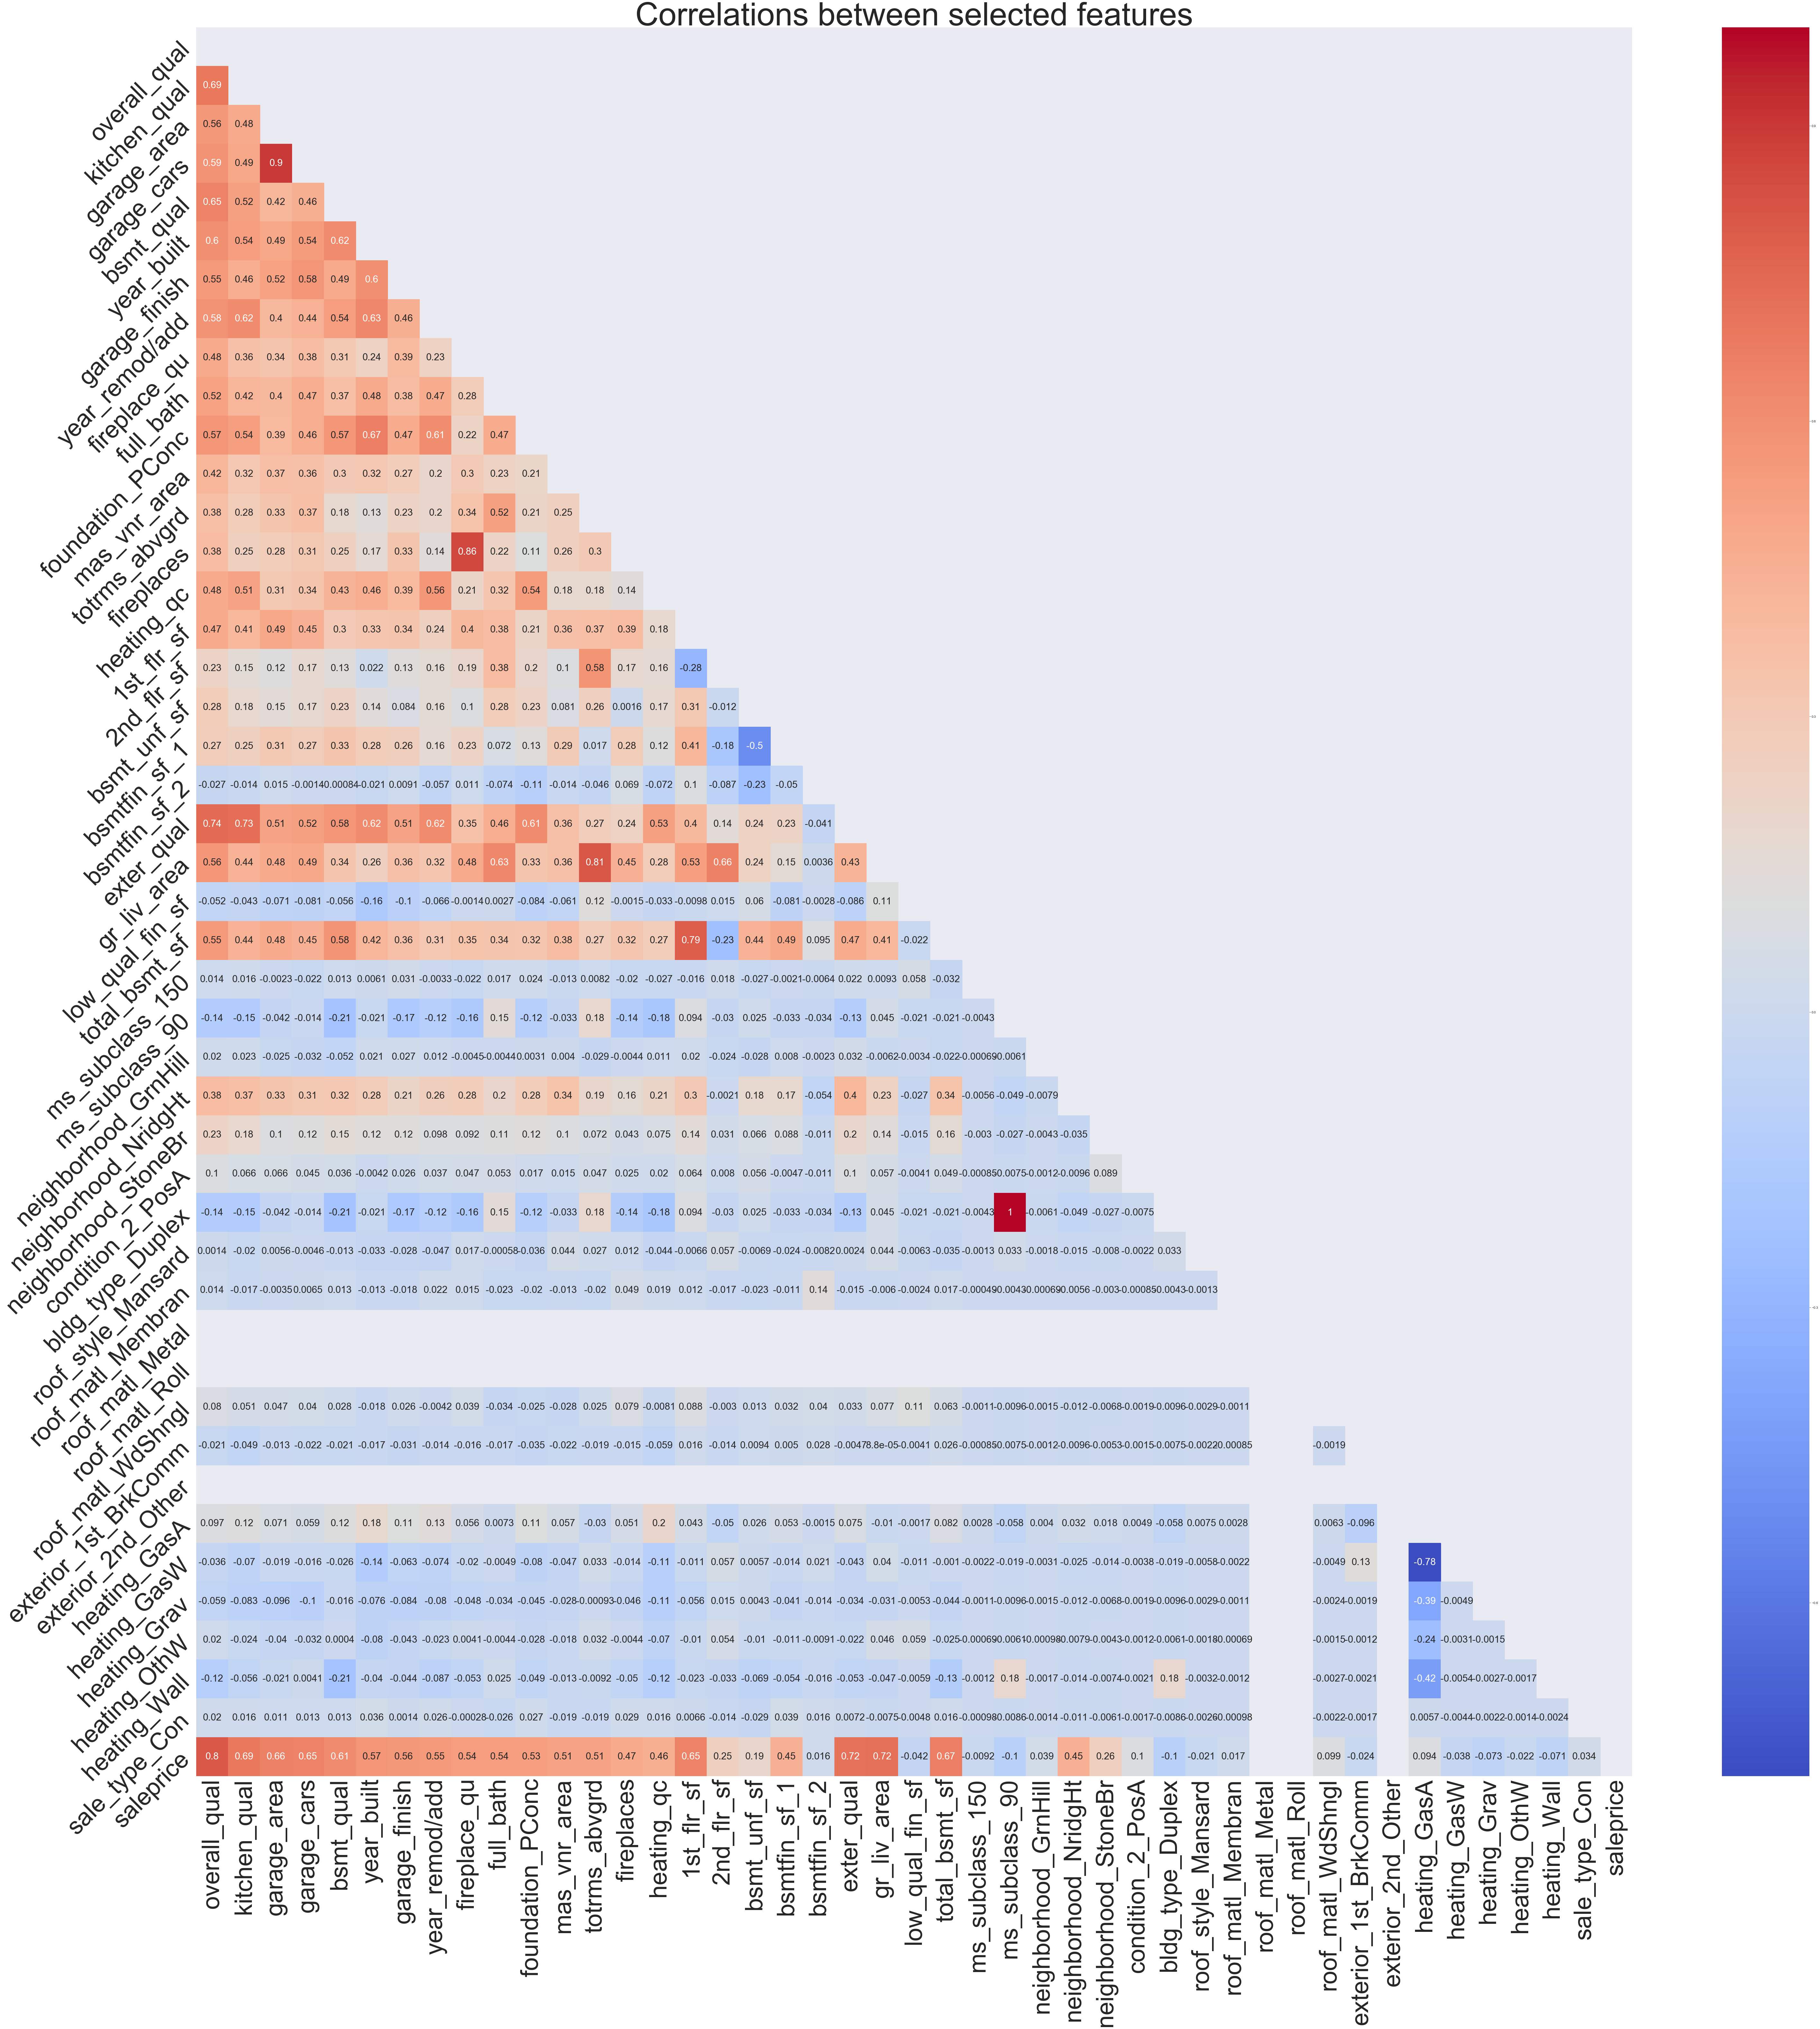

In [38]:
# Heatmap to look into the correlation between selected features(especially continuous)
corr = df_tr.corr()
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
labels=['overall_qual','kitchen_qual','garage_area','garage_cars','bsmt_qual',
        'year_built','garage_finish','year_remod/add','fireplace_qu','full_bath','foundation_PConc',
         'mas_vnr_area','totrms_abvgrd','fireplaces','heating_qc',                    
        '1st_flr_sf', '2nd_flr_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'exter_qual', 'gr_liv_area', 'low_qual_fin_sf',
       'total_bsmt_sf', 'ms_subclass_150', 'ms_subclass_90',
       'neighborhood_GrnHill', 'neighborhood_NridgHt', 'neighborhood_StoneBr',
       'condition_2_PosA', 'bldg_type_Duplex', 'roof_style_Mansard',
       'roof_matl_Membran', 'roof_matl_Metal', 'roof_matl_Roll',
       'roof_matl_WdShngl', 'exterior_1st_BrkComm', 'exterior_2nd_Other',
       'heating_GasA', 'heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'sale_type_Con','saleprice']
plt.subplots(figsize=(100,100))
ax = plt.axes()
sns.heatmap(corr,mask=mask,annot = True,annot_kws={'size':30},cmap="coolwarm",ax=ax)
ax.set_xticklabels(labels,size = 75,rotation=90)
ax.set_yticklabels(labels,size = 75,rotation=45)
ax.set_title('Correlations between selected features', size = 100)
plt.savefig("heatmap.png")

## highly correlated variables
We could find some of the variables are highly correlated from the heatmap.
The correlated variables are as follows.
##### 1.garage_cars and garage_area                                                                                                   
##### 2.fireplaces and fireplace_qu 
##### 3.overall_qual, Exter_qual and Kitchen_qual
##### 4.gr_liv_area and totrms_abvgrd
##### 5.1st_flr_sf and total_bsmt_sf
##### 6.ms_subclass_90 and bldg_type_duplex
##### 7.heating_gasA and heating_gasW

roof_matl_Metal, roof_matl_Roll and exterior_2nd_Other don't have any values in their training set.

In [39]:
initial_features=['overall_qual','kitchen_qual','garage_area','garage_cars','bsmt_qual',
        'year_built','garage_finish','year_remod/add','fireplace_qu','full_bath','foundation_PConc',
         'mas_vnr_area','totrms_abvgrd','fireplaces','heating_qc',                    
        '1st_flr_sf', '2nd_flr_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'exter_qual', 'gr_liv_area', 'low_qual_fin_sf',
       'total_bsmt_sf', 'ms_subclass_150', 'ms_subclass_90',
       'neighborhood_GrnHill', 'neighborhood_NridgHt', 'neighborhood_StoneBr',
       'condition_2_PosA', 'bldg_type_Duplex', 'roof_style_Mansard',
       'roof_matl_Membran', 'roof_matl_Metal', 'roof_matl_Roll',
       'roof_matl_WdShngl', 'exterior_1st_BrkComm', 'exterior_2nd_Other',
       'heating_GasA', 'heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'sale_type_Con']

##### Features are selected for doing Exploratory data analysis. which has the variables with correlation above 0.5 and the variable selected with RFECV.

##### Scatter Plots for exploring the features against saleprice

In [40]:
# Function for constructing the scatter plot
def scatter(predictor_list,target,dataframe,list_of_xaxis,title):
    n = int(np.ceil(len(predictor_list)/3))

    fig, ax = plt.subplots(nrows=n,ncols=3,figsize=(50,150))

    ax = ax.ravel()
    for i,item in enumerate (predictor_list):
        ax[i].scatter(dataframe[item], dataframe[target])
        ax[i].set_xlabel(list_of_xaxis[i],fontsize = 30) 
        ax[0].set_title(title, size = 50)  
        for i in range(len(predictor_list),n*3):
            ax[i].axis('off')    
        
        

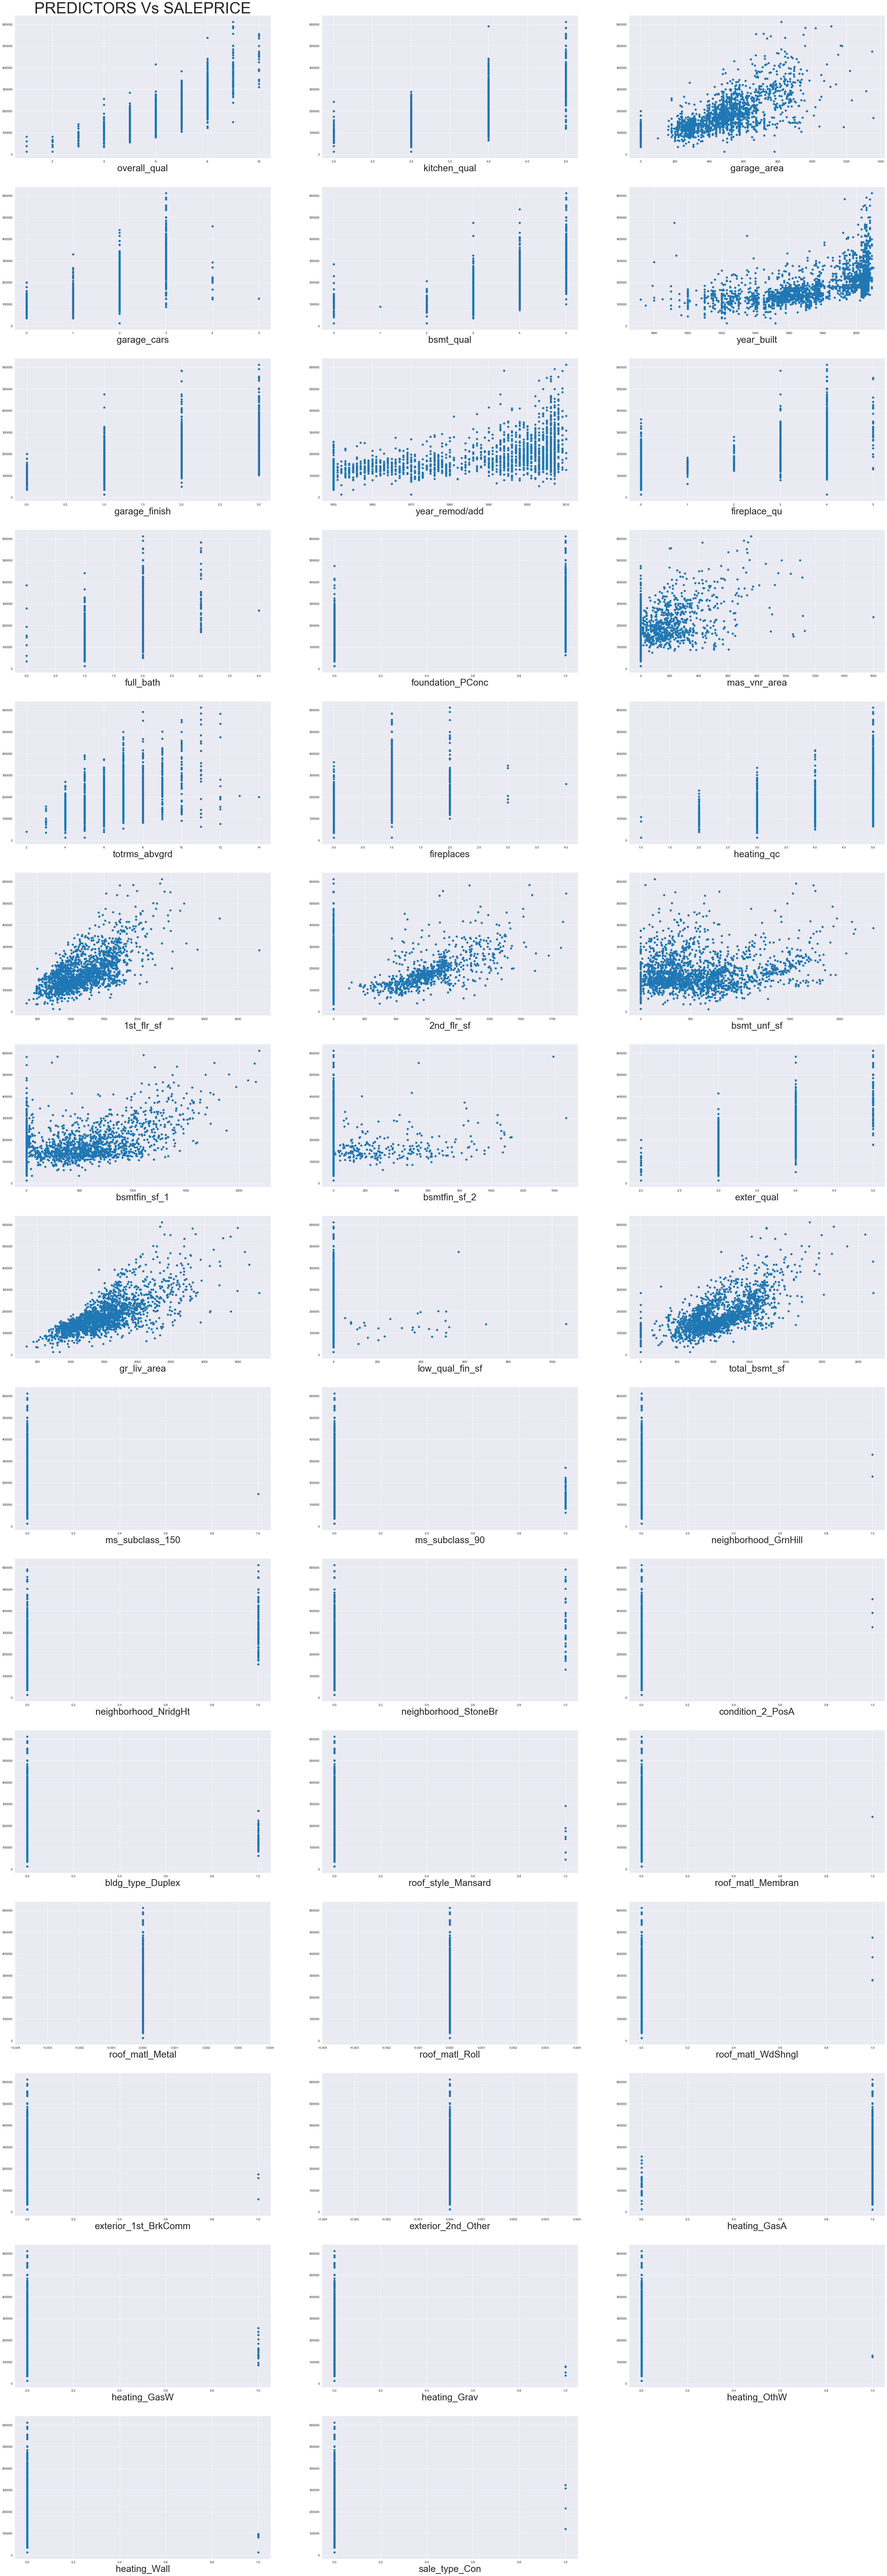

In [41]:
# calling the scatter function to obtain the scatter plot for the selected intial features.
scatter(initial_features,'saleprice',df_tr,initial_features,'PREDICTORS Vs SALEPRICE'  )

##### We could see that most of the features are in a linear relationship either positive or negtive with our target saleprice as per the requirement for multilinear model. But we cannot check the linearity for some categorical variables and some continuous variable like low qual fin sf, bsmtfin_sf_2 ans bsmt_unf_sf. but those variables are selected by RFECV.

In [42]:
# Function to construct histogram for the independat variables
def hist(predictor_list_target,dataframe,list_of_xaxis,title):
    n = int(np.ceil(len(predictor_list_target)/3))

    fig, ax = plt.subplots(nrows=n,ncols=3,figsize=(50,150))
    ax = ax.ravel()
    
    for i,item in enumerate (predictor_list_target):
        ax[i].hist(dataframe[item])
        ax[i].set_xlabel(list_of_xaxis[i],fontsize = 30) 
        ax[0].set_title(title, size = 50)  
        for i in range(len(predictor_list_target),n*3):
            ax[i].axis('off')    
        

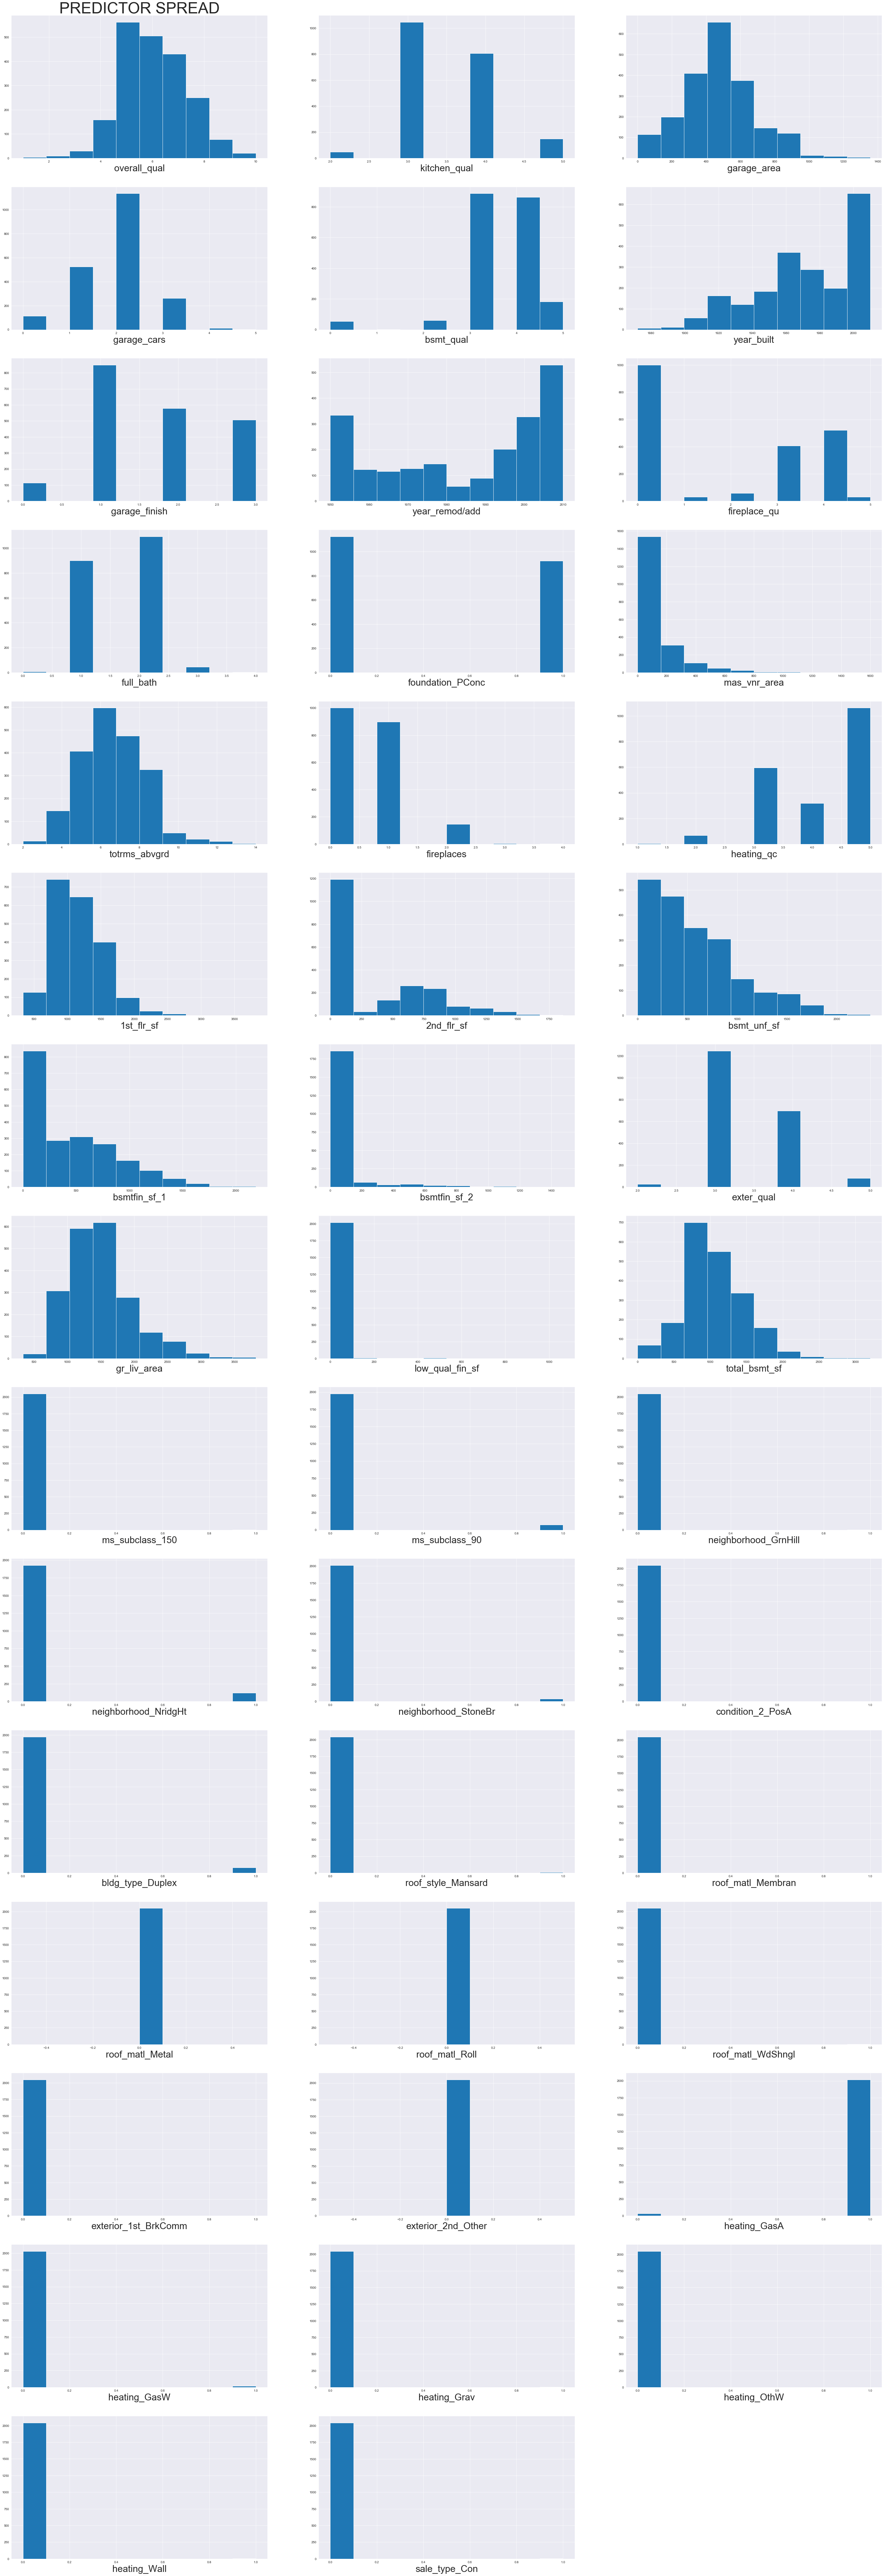

In [43]:
# hist function is called to construct histogram for initial features
hist(initial_features,df_tr,initial_features,'PREDICTOR SPREAD' )
           

##### From the above histogram we could see our features have ups and down and they are not normally distributed except garage area, overall_qual, garage_cars and totrms_abvgrd. So now we are going to train our model for the above distribution.

Text(0.5, 1.0, 'Saleprice Range')

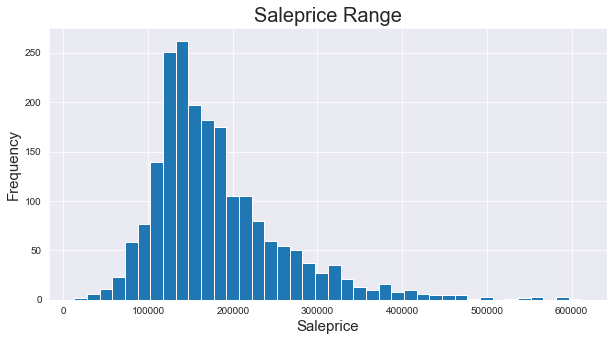

In [44]:
# constructing the histogram for target variable with hist function.
plt.subplots(figsize=(10,5))
plt.hist(df_tr['saleprice'],bins=40);
plt.xlabel('Saleprice',fontsize = 15) 
plt.ylabel('Frequency',fontsize = 15) 
plt.title('Saleprice Range', size = 20) 

##### Sales price is somewhat normally distributed. The sales range is higher in the range 100000 to 300000. So when we train the model will good to predict the price in this range. Especially, there is sparse data for the houses sold above 500000. So, the model may perform poorer for house sale price that fall in the range of 500000 to 600000.

In [45]:
# Function for calculating Adjusted R2. p is the number of predictors used in the model.
def r2_adj(y_true, y_preds, p):
    n = len(y_true)
    y_mean = np.mean(y_true)
    numerator = np.sum(np.square(y_true - y_preds)) / (n - p - 1)
    denominator = np.sum(np.square(y_true - y_mean)) / (n - 1)
    return 1 - numerator / denominator

In [46]:
# Function for calculating Root mean square error
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [47]:
# Created a dataframe to store the results of various models to be constructed and to compare their
# performance.

output = pd.DataFrame(index=['featureset','lr_train_ score','lr_coefficient','lr_intercept','lr_adj_r2_score','lr_rmse',
                            'ridge_train_score','ridge_coefficient','ridge_intercept','ridge_adj_r2_score','ridge_rmse',
                            'lasso_train_score','lasso_coefficient','lasso_intercept','lasso_adj_r2_score','lasso_rmse',
                            'enet_train_score','enet_coefficient','enet_intercept','enet_adj_r2_score','enet_rmse'
                                       ])
output

Empty DataFrame
Columns: []
Index: [featureset, lr_train_ score, lr_coefficient, lr_intercept, lr_adj_r2_score, lr_rmse, ridge_train_score, ridge_coefficient, ridge_intercept, ridge_adj_r2_score, ridge_rmse, lasso_train_score, lasso_coefficient, lasso_intercept, lasso_adj_r2_score, lasso_rmse, enet_train_score, enet_coefficient, enet_intercept, enet_adj_r2_score, enet_rmse]

In [48]:
# Initialize the StandardScaler object outside the function so that it can be used while 
# constructing the final model
ss = StandardScaler()

In [49]:
# Function created to build a model with selected featureset using linear regression and to check the effect of regularisation.
# This function returns the result of linear regression and regularisation as a column to be added to the Output dataframe
def model(featureset,model_no):
    #defining the independant variables and target variable
    X = df_tr[featureset]
    y = df_tr['saleprice']
    # splitting the data at 80:20 % for train and test data respectively
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)
    # initialising Linear Regression, fitting, predicting and finding train score, rmse and adjusted R square
    lr=LinearRegression()
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(X_test)
    lr_train_score=(cross_val_score(lr,X_train,y_train,cv=5)).mean()
    lr_coefficient=lr.coef_
    lr_intercept=lr.intercept_
    p=len(featureset)
    lr_adj_r2_score=r2_adj(y_test, lr_pred, p)
    lr_rmse=rmse(lr_pred, y_test)
    # use the .fit_transform function to standardize the X_train and .transform to standardize the X_test
    X_train_ss = ss.fit_transform(X_train)
    X_test_ss=ss.transform(X_test)
    # initialising ridge regression with optimal ridge alpha, fitting, predicting, finding train score, rmse and adj. R square
    ridge_alphas = np.logspace(0, 5, 200)
    optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
    optimal_ridge.fit(X_train_ss, y_train)
    ridge = Ridge(alpha=optimal_ridge.alpha_)
    ridge_train_score = cross_val_score(ridge, X_train_ss, y_train, cv=5).mean()
    ridge_coefficient=lr.coef_
    ridge_intercept=lr.intercept_
    ridge_pred = optimal_ridge.predict(X_test_ss)
    ridge_adj_r2_score=r2_adj(y_test, ridge_pred, p)
    ridge_rmse=rmse(ridge_pred, y_test)
    # initialising lasso regression with optimal lasso alpha, fitting, predicting, finding train score, rmse and adj. R square
    optimal_lasso = LassoCV(n_alphas=500, cv=10)
    optimal_lasso.fit(X_train_ss, y_train,)
    lasso = Lasso(alpha=optimal_lasso.alpha_)
    lasso_train_score = cross_val_score(lasso, X_train_ss, y_train, cv=10).mean()
    lasso_coefficient=lr.coef_
    lasso_intercept=lr.intercept_
    lasso_pred = optimal_lasso.predict(X_test_ss)
    lasso_adj_r2_score=r2_adj(y_test, lasso_pred, p)
    lasso_rmse=rmse(lasso_pred, y_test)
    # initialising enet regression with optimal l1 ratio, fitting, predicting, finding train score, rmse and adj. R square
    l1_ratios = np.linspace(0.01, 1.0, 25)
    optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=100, cv=10)
    optimal_enet.fit(X_train_ss, y_train)
    enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)
    enet_train_score = cross_val_score(enet, X_train_ss, y_train, cv=10).mean()
    enet_coefficient=lr.coef_
    enet_intercept=lr.intercept_
    enet_pred = optimal_enet.predict(X_test_ss)
    enet_adj_r2_score=r2_adj(y_test, enet_pred, p)
    enet_rmse=rmse(enet_pred, y_test)
    # Adding column to output dataframe
    output[model_no]=[featureset,lr_train_score,lr_coefficient,lr_intercept,lr_adj_r2_score,lr_rmse,
                ridge_train_score,ridge_coefficient,ridge_intercept,ridge_adj_r2_score,ridge_rmse,
                lasso_train_score,lasso_coefficient,lasso_intercept,lasso_adj_r2_score,lasso_rmse,
                enet_train_score,enet_coefficient,enet_intercept,enet_adj_r2_score,enet_rmse]
    return output[model_no]

In [50]:
#featureset1 is same as initial features. This is the 1st set of feature for our model
featureset1= ['overall_qual','kitchen_qual','garage_area','garage_cars','bsmt_qual',
        'year_built','garage_finish','year_remod/add','fireplace_qu','full_bath','foundation_PConc',
         'mas_vnr_area','totrms_abvgrd','fireplaces','heating_qc',                    
        '1st_flr_sf', '2nd_flr_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'exter_qual', 'gr_liv_area', 'low_qual_fin_sf',
       'total_bsmt_sf', 'ms_subclass_150', 'ms_subclass_90',
       'neighborhood_GrnHill', 'neighborhood_NridgHt', 'neighborhood_StoneBr',
       'condition_2_PosA', 'bldg_type_Duplex', 'roof_style_Mansard',
       'roof_matl_Membran', 'roof_matl_Metal', 'roof_matl_Roll',
       'roof_matl_WdShngl', 'exterior_1st_BrkComm', 'exterior_2nd_Other',
       'heating_GasA', 'heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'sale_type_Con']
#calling the model function with featureset1 and adding our 1st column to output dataframe
output[1]=model(featureset1,1)


In [51]:
# for featureset2 I have used the variable which we got as output for RFECV
featureset2=['1st_flr_sf', '2nd_flr_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1',
       'bsmtfin_sf_2', 'exter_qual', 'gr_liv_area', 'low_qual_fin_sf',
       'total_bsmt_sf', 'ms_subclass_150', 'ms_subclass_90',
       'neighborhood_GrnHill', 'neighborhood_NridgHt', 'neighborhood_StoneBr',
       'condition_2_PosA', 'bldg_type_Duplex', 'roof_style_Mansard',
       'roof_matl_Membran', 'roof_matl_Metal', 'roof_matl_Roll',
       'roof_matl_WdShngl', 'exterior_1st_BrkComm', 'exterior_2nd_Other',
       'heating_GasA', 'heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'sale_type_Con']
#calling the model function with featureset2 and adding our 2nd column to output dataframe
output[2]=model(featureset2,2)

### retained one of the highly correlated variables for featureset3
##### garage_cars(removed) and garage_area 
##### fireplaces(removed) and fireplace_qu 
##### overall_qual, Exter_qual(removed) and Kitchen_qual(removed)
##### gr_liv_area and totrms_abvgrd(removed)
##### 1st_flr_sf and total_bsmt_sf (aggregated them instead of removing them)
##### ms_subclass_90 and bldg_type_duplex(removed)
##### heating_gasA(removed) and heating_gasW

In [52]:
# aggregated the sf for featureset 3
df_tr['total_sf']=df_tr['1st_flr_sf']+df_tr['2nd_flr_sf']+df_tr['total_bsmt_sf']+df_tr['garage_area']


In [53]:
# Now the independant variables in this featureset has less correlation and also have 1 aggregated variable for all sf
featureset3=['total_sf', 'bsmt_unf_sf', 'bsmtfin_sf_1','bsmtfin_sf_2',  'gr_liv_area', 'low_qual_fin_sf',
        'ms_subclass_150','ms_subclass_90','overall_qual','neighborhood_GrnHill', 'neighborhood_NridgHt','neighborhood_StoneBr',
       'condition_2_PosA',  'roof_style_Mansard','roof_matl_Membran', 'roof_matl_Metal', 'roof_matl_Roll',
       'roof_matl_WdShngl', 'exterior_1st_BrkComm', 'exterior_2nd_Other','heating_GasW', 'heating_Grav', 'heating_OthW',
       'heating_Wall', 'sale_type_Con']
#calling the model function with featureset3 and adding our 3rd column to result dataframe
output[3]=model(featureset3,3)

Lasso coefficient for Featureset 1. Based on this we will remove features with 0 coefficient for featureset4. Also removing 2nd flr_sf as its correlation with sales price is less compared to other variables. This time aggregated only 1st_flr_sf and total_bsmt_sf.
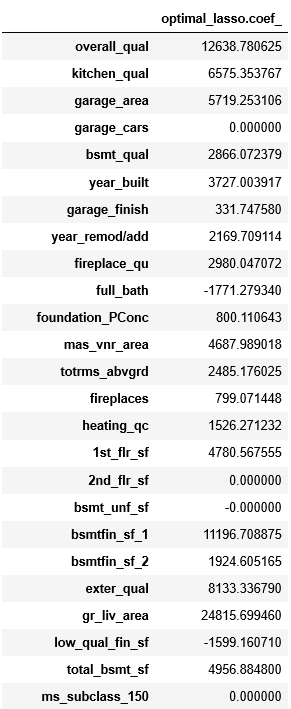

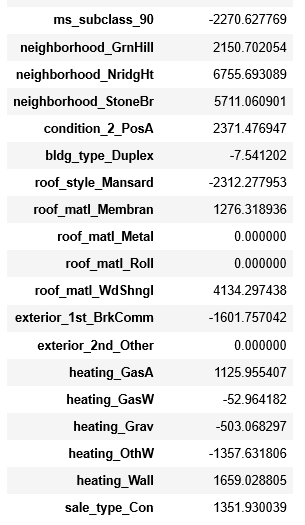

In [54]:
#creating the aggregate for 1st flr sf and total bsmt sf
# variables with 0 or very low lasso coefficient for featureset1 is removed in the set
df_tr['1st_flr_sf+total_bsmt_sf']=df_tr['1st_flr_sf']+df_tr['total_bsmt_sf']
#featureset4
featureset4= ['1st_flr_sf+total_bsmt_sf','overall_qual','garage_area','year_built','year_remod/add',
              'fireplace_qu','full_bath','mas_vnr_area','heating_qc','bsmtfin_sf_1', 'gr_liv_area',
              'low_qual_fin_sf', 'ms_subclass_90','neighborhood_GrnHill', 'neighborhood_NridgHt',
              'neighborhood_StoneBr','condition_2_PosA','roof_style_Mansard','roof_matl_Membran',
              'roof_matl_WdShngl','exterior_1st_BrkComm','heating_GasA', 'heating_OthW',
              'heating_Wall','sale_type_Con']
#calling the model function with featureset4 and adding our 4th column to result dataframe
output[4]=model(featureset4,4)


In [55]:
#'heating_GasA', 'heating_OthW','exterior_1st_BrkComm''condition_2_PosA','roof_style_Mansard',
#'roof_matl_WdShngl','roof_matl_Membran', affects the saleprice very less compared 
# to the other variables based on the lasso coefficient for featureset1 are removed.
#(Also tested after removing each variable one at a time).
# kitchen_qual and 'exter_qual' which are well correlated with saleprice are added.
#featureset5 
featureset5= ['1st_flr_sf+total_bsmt_sf','overall_qual','garage_area','year_built','fireplace_qu',
              'full_bath','mas_vnr_area','heating_qc','bsmtfin_sf_1', 'gr_liv_area', 'kitchen_qual',
              'ms_subclass_90','year_remod/add','neighborhood_GrnHill', 'neighborhood_NridgHt',
              'neighborhood_StoneBr', 'heating_Wall','sale_type_Con','low_qual_fin_sf','exter_qual']
#calling the model function with featureset4 and adding our 4th column to result dataframe
output[5]=model(featureset5,5)

In [56]:
# Cheking the output dataframe
output

1  \
featureset          [overall_qual, kitchen_qual, garage_area, gara...   
lr_train_ score                                              0.875172   
lr_coefficient      [8696.126291687944, 9751.075416085356, 29.5768...   
lr_intercept                                                  -591802   
lr_adj_r2_score                                              0.866632   
lr_rmse                                                         26645   
ridge_train_score                                             0.87613   
ridge_coefficient   [8696.126291687944, 9751.075416085356, 29.5768...   
ridge_intercept                                               -591802   
ridge_adj_r2_score                                           0.866987   
ridge_rmse                                                    26609.5   
lasso_train_score                                            0.874577   
lasso_coefficient   [8696.126291687944, 9751.075416085356, 29.5768...   
lasso_intercept                                               -591802   
lasso_adj_r2_score                                           0.866892   
lasso_rmse                                                      26619   
enet_train_score                                             0.874576   
enet_coefficient    [8696.126291687944, 9751.075416085356, 29.5768...   
enet_intercept                                                -591802   
enet_adj_r2_score                                            0.866881   
enet_rmse                                                     26620.1   

                                                                    2  \
featureset          [1st_flr_sf, 2nd_flr_sf, bsmt_unf_sf, bsmtfin_...   
lr_train_ score                                              0.839866   
lr_coefficient      [41.720688254588445, 33.511141804521266, -3.00...   
lr_intercept                                                  -153292   
lr_adj_r2_score                                              0.815861   
lr_rmse                                                       31945.4   
ridge_train_score                                            0.840468   
ridge_coefficient   [41.720688254588445, 33.511141804521266, -3.00...   
ridge_intercept                                               -153292   
ridge_adj_r2_score                                           0.816629   
ridge_rmse                                                    31878.7   
lasso_train_score                                            0.837722   
lasso_coefficient   [41.720688254588445, 33.511141804521266, -3.00...   
lasso_intercept                                               -153292   
lasso_adj_r2_score                                           0.816901   
lasso_rmse                                                    31855.1   
enet_train_score                                             0.837721   
enet_coefficient    [41.720688254588445, 33.511141804521266, -3.00...   
enet_intercept                                                -153292   
enet_adj_r2_score                                            0.816898   
enet_rmse                                                     31855.3   

                                                                    3  \
featureset          [total_sf, bsmt_unf_sf, bsmtfin_sf_1, bsmtfin_...   
lr_train_ score                                              0.850056   
lr_coefficient      [43.320316137707785, -20.19723791835457, 9.104...   
lr_intercept                                                 -80876.2   
lr_adj_r2_score                                              0.853113   
lr_rmse                                                       28681.4   
ridge_train_score                                             0.85012   
ridge_coefficient   [43.320316137707785, -20.19723791835457, 9.104...   
ridge_intercept                                              -80876.2   
ridge_adj_r2_score                                           0.852784   
ridge_rmse                                         

### Model 1 has the highest accuracy but it is complex with 44 features. 
     Kaggle RMSE - 32468.64427
### Model 2 has the least accuracy. They also overfit with the training data. (29 features)
     Kaggle RMSE -37564.62481
### Model 3 is better than model2 but also model2 also overfit with the training data.
     Kaggle RMSE -33087.02166
### Compared to model1, model 4 has slightly lesser accuracy but still the code is simpler(only 25 features) than model1 and has better accuracy compared to Model2 & 3.   
    Kaggle RMSE -32553.17515

### Model 5 and Final model has better accuracy than any other model.   The ridge adjusted R2 is 0.870895 for test data is higher than the ridge score for train data 0.885387. So, The model also does not overfit with the training data. So, The model also does not overfit with the training data. This model has only 20 features. It is simple compared to the other model. 
    Kaggle RMSE-31386.30343


# MODELING AND MODEL EVALUATION

In [57]:
# Our X valve is our independant variables stored under features. Y value or our target is saleprice.
X = df_tr[featureset5]
y = df_tr['saleprice']

In [58]:
# As per industrial norm the train and test data is split into 80:20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state = 42)

## STANDARDISATION

In [59]:
#Initialize the StandardScaler object
ss = StandardScaler()

# # use the .fit_transform function to standardize the X_train and .transform to standardize the X_test
X_train_ss = ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

## RIDGE CROSS VALIDATION


In [60]:
#finding the optimal ridge alpha
ridge_alphas = np.logspace(0, 5, 200)

optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=5)
optimal_ridge.fit(X_train_ss, y_train)

print (optimal_ridge.alpha_)


30.36771118035459


In [61]:
# Finding the ridge score for the train data
ridge = Ridge(alpha=optimal_ridge.alpha_)

ridge_scores = cross_val_score(ridge, X_train_ss, y_train, cv=5)
print(ridge_scores)
print(ridge_scores.mean())

[0.88185935 0.86715486 0.86629177 0.88580666 0.85336379]
0.8708952865624173


In [62]:
#print the ridge intercept
print (optimal_ridge.intercept_)

182104.22635753508


In [63]:
#dataframe created to store the ridge coefficient
pd.DataFrame(optimal_ridge.coef_,index=featureset5,columns=['optimal_ridge.coef_'])

optimal_ridge.coef_
1st_flr_sf+total_bsmt_sf         10334.129867
overall_qual                     14087.230060
garage_area                       6215.464311
year_built                        4846.369409
fireplace_qu                      4083.293274
full_bath                        -2341.720311
mas_vnr_area                      4283.275063
heating_qc                        2137.743749
bsmtfin_sf_1                     10778.963489
gr_liv_area                      26139.665292
kitchen_qual                      6990.952910
ms_subclass_90                   -2316.801186
year_remod/add                    2747.632162
neighborhood_GrnHill              2181.825159
neighborhood_NridgHt              6461.711762
neighborhood_StoneBr              5786.185020
heating_Wall                      1145.642301
sale_type_Con                     1386.362785
low_qual_fin_sf                  -1081.426083
exter_qual                        7855.207231

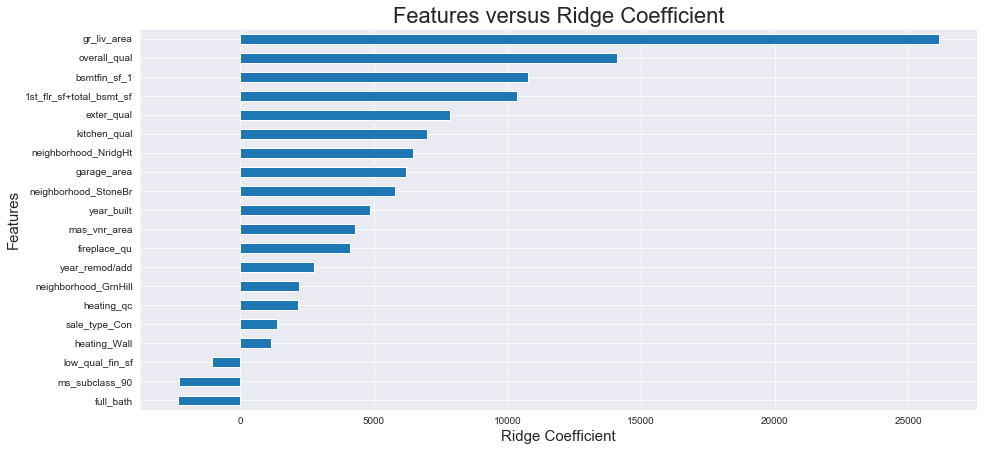

In [64]:
#plot to visualize the features involved in the model and effect of its coefficient
plot=pd.Series(optimal_ridge.coef_,index=featureset5).sort_values().plot.barh(figsize=(15,7))
plt.ylabel('Features',fontsize = 15) 
plt.xlabel('Ridge Coefficient',fontsize = 15) 
plt.title('Features versus Ridge Coefficient', size = 22)
plt.savefig("RidgeCoeff.png")

***Variables with positive relation with saleprice***:Price increase with increase in the variables
gr_liv_area, overall qual, bsmtfin_sf_1, 1st_flr_sf+total_bsmt_sf,exter_qual,kitchen_qual, neighbourhood_NridgHt, garage_area, neighbourhood_StoneBr,year_built,year_remod/add, mas_vnr_area, fireplace_qu,heating_qc,neighbourhood_grnHill,heating_Wall and sale_typ_Con

***Variables with negative relation with saleprice***:Price decrease with increase in the variables
full_bath, low_qual_fin_sf, and ms_subclass_90.

In [65]:
# pediction of sales is executed
Ridge_pred = optimal_ridge.predict(X_test_ss)

In [66]:
# Adjusted R2 for is calculated
ridge_adj_r2_score=r2_adj(y_test, Ridge_pred, 20)
ridge_adj_r2_score

0.8853868342510992

In [67]:
#RMSE is calculated
rmse(Ridge_pred, y_test)

25499.711592683936

In [68]:
# converting y_test data series into a temporary dataframe
temp1 = y_test.to_frame()
# Get the index number as a list
list1 = []
for row in temp1.index: 
    list1.append(row)
   

In [69]:
# temporary dataframe is created to store the predicted result with index same as temp1 dataframe
temp2 = pd.DataFrame(Ridge_pred,columns=['Ridge_pred'],index=list1)

In [70]:
# concatinating the 2 temporary dataframe into another temporary dataframe
temp=pd.concat([temp1, temp2],axis=1)
temp.head()

saleprice     Ridge_pred
1974   118000.0  131075.963507
694    302000.0  256453.799367
906     97000.0  113131.886080
544    137000.0  127924.372838
1847   119000.0  115671.056935

Text(0.5, 1.0, 'Test price Vs Predicted price')

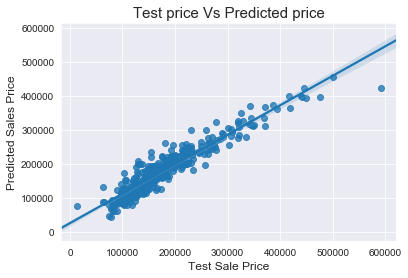

In [71]:
# sns regplot is plotted between the Test price and Predicted price
sns.regplot(x='saleprice', y='Ridge_pred', data=temp)
plt.xlabel('Test Sale Price',fontsize = 12) 
plt.ylabel('Predicted Sales Price',fontsize = 12) 
plt.title('Test price Vs Predicted price', size = 15)


The Predicted sales price have a linear relationship with y-test except for few outliers.

Text(0.5, 1.0, 'Ridge Residual Histogram')

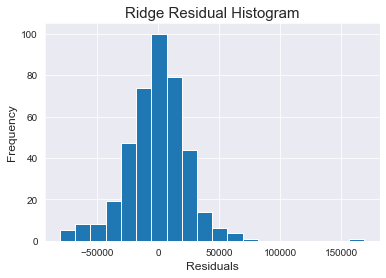

In [72]:
# Histogram plotted to check the Residual distribution
residuals_r = y_test - Ridge_pred
plt.hist(residuals_r,bins=20);
plt.xlabel('Residuals',fontsize = 12) 
plt.ylabel('Frequency',fontsize = 12) 
plt.title('Ridge Residual Histogram', size = 15) 

##### The residual plot shows a normal distribution. This shows about 100 observation show a 0 residual and the residual goes down from there. But there is a outlier with residual of about 170000. This is due to outliers in our data.

Text(0.5, 1.0, 'Ridge Predicted price Vs Residual')

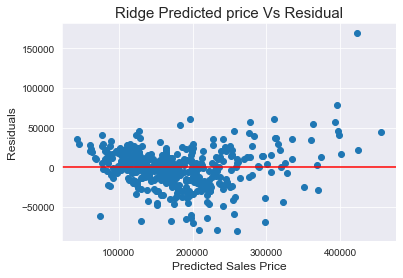

In [73]:
# Scatter plot plotted between Prediction and Residual
plt.scatter(x=Ridge_pred, y=residuals_r)
plt.axhline(0, color='r')
plt.xlabel('Predicted Sales Price',fontsize = 12) 
plt.ylabel('Residuals',fontsize = 12) 
plt.title('Ridge Predicted price Vs Residual', size = 15)  

###### The above plot shows less variance for smaller value of sales.While the variance is higher and most of the points are above line which shows the predicted price is lower than the actual sales for most of the sales more than USD 300000. But the model is Homoskedastic as per the requirement for linear model.

##### The RMSE for the ridge is 27087.94 which is lower than the linear regression model 27121.80. So, Ridge model is better.

# PREDICTION WITH TEST DATA

In [74]:
# Aggregating 1st_flr_sf and total_bsmt_sf as perour model 5 with featureset5
df_tst['1st_flr_sf+total_bsmt_sf']=df_tst['1st_flr_sf']+df_tst['total_bsmt_sf']

df_tst=df_tst.loc[:,['id','1st_flr_sf+total_bsmt_sf','overall_qual','garage_area','year_built','fireplace_qu',
              'full_bath','mas_vnr_area','heating_qc','bsmtfin_sf_1', 'gr_liv_area', 'kitchen_qual',
              'ms_subclass_90','year_remod/add','neighborhood_GrnHill', 'neighborhood_NridgHt',
              'neighborhood_StoneBr', 'heating_Wall','sale_type_Con','low_qual_fin_sf','exter_qual']]

df_tst.head()

id  1st_flr_sf+total_bsmt_sf  overall_qual  garage_area  year_built  \
2051  2658                    1928.0             6        440.0        1910   
2052  2718                    3934.0             5        580.0        1977   
2053  2414                    1318.0             7        426.0        2006   
2054  1989                    1936.0             5        480.0        1923   
2055   625                    2788.0             6        514.0        1963   

      fireplace_qu  full_bath  mas_vnr_area  heating_qc  bsmtfin_sf_1  \
2051             0          2           0.0           4           0.0   
2052             0          2           0.0           3           0.0   
2053             4          2           0.0           5         554.0   
2054             0          1           0.0           3           0.0   
2055             4          1         247.0           4         609.0   

      gr_liv_area  kitchen_qual  ms_subclass_90  year_remod/add  \
2051         1928             2               0            1950   
2052         1967             3               1            1977   
2053         1496             4               0            2006   
2054          968             3               0            2006   
2055         1394             3               0            1963   

      neighborhood_GrnHill  neighborhood_NridgHt  neighborhood_StoneBr  \
2051                     0                     0                     0   
2052                     0                     0                     0   
2053                     0                     0                     0   
2054                     0                     0                     0   
2055                     0                     0                     0   

      heating_Wall  sale_type_Con  low_qual_fin_sf  exter_qual  
2051             0              0                0           3  
2052             0              0                0           3  
2053             0              0                0           4  
2054             0              0                0           4  
2055             0              0                0           3

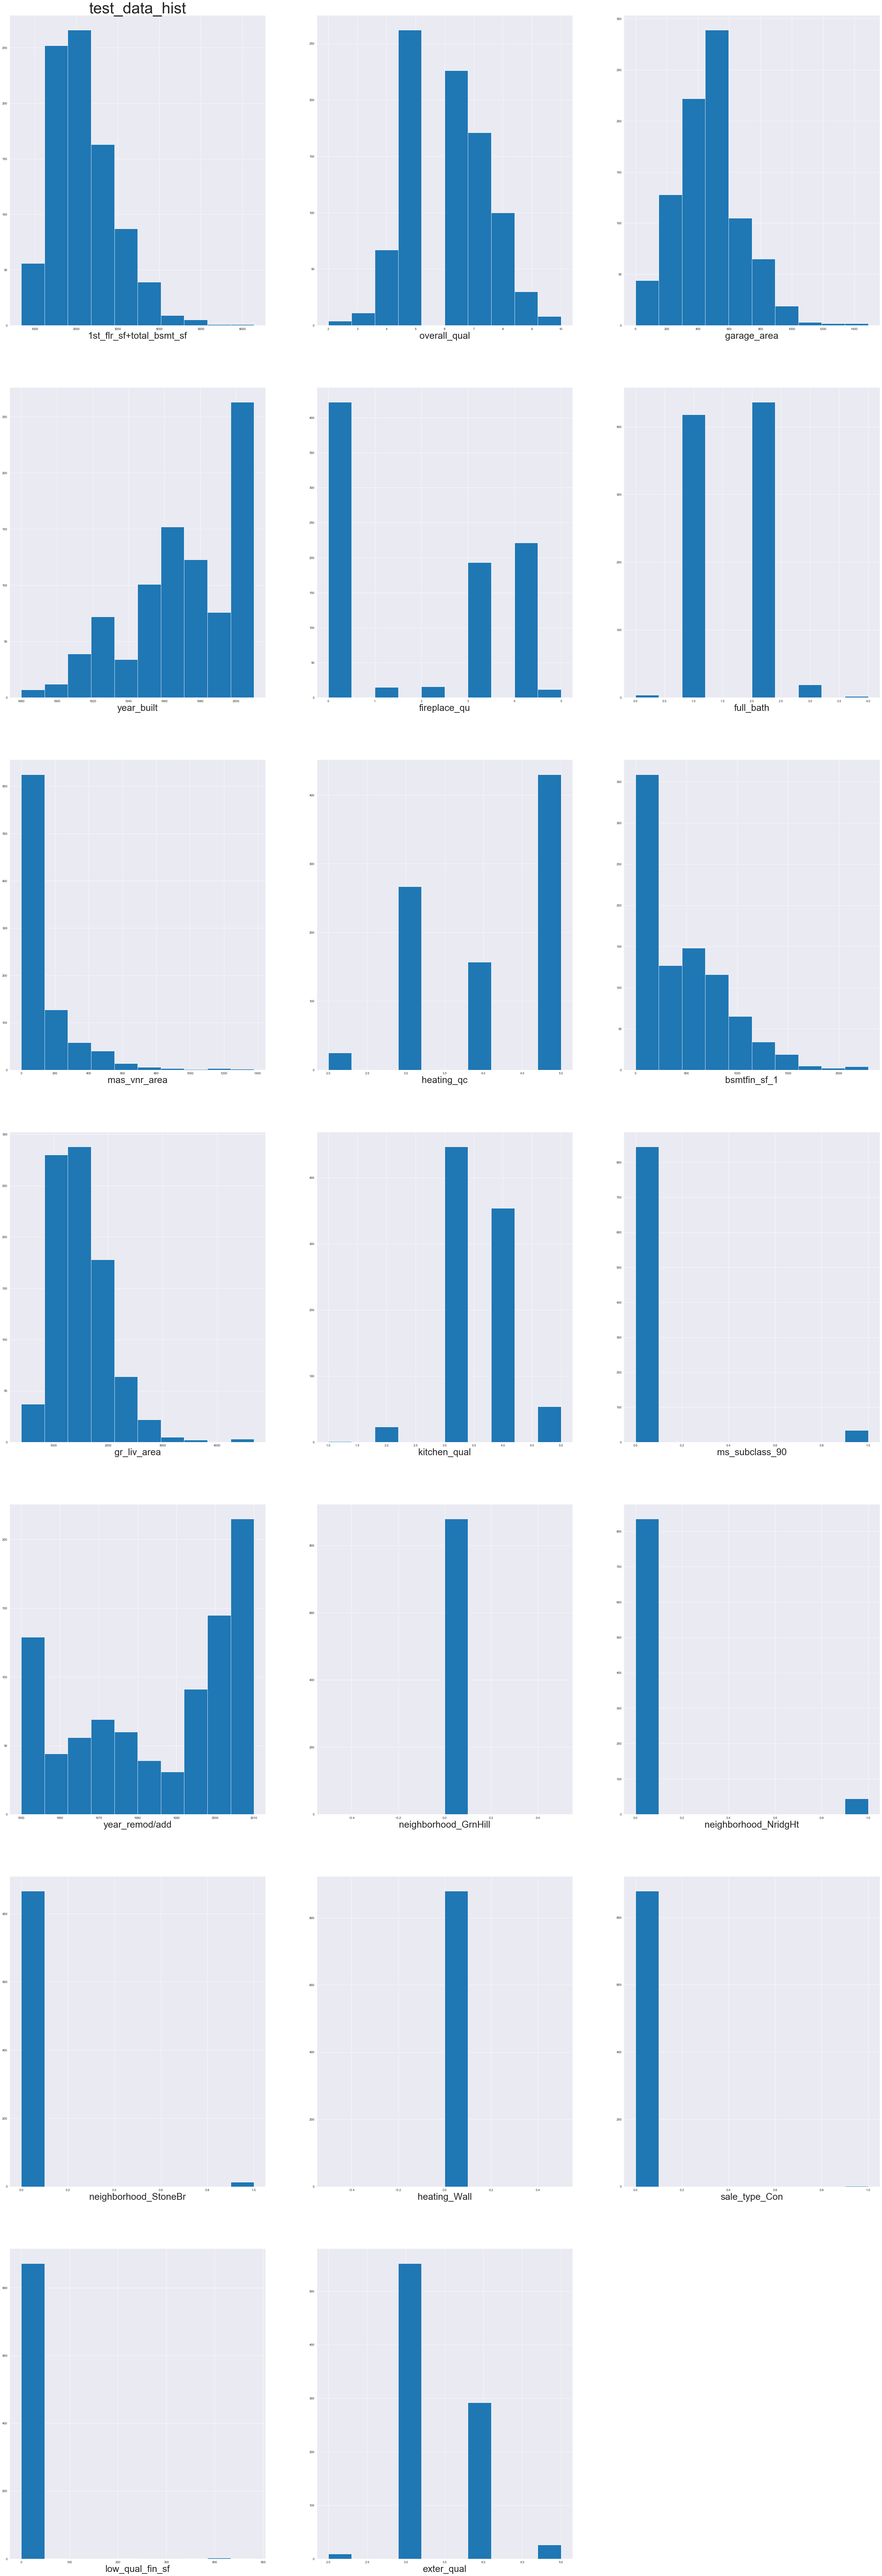

In [75]:
hist(featureset5,df_tst,featureset5,'test_data_hist')


##### The above graph illustrate the spread of test data. The data has a uneven spread.

In [76]:
# Standardisation and predicting with ridge model
df_tst_ss=ss.transform(df_tst.loc[:, df_tst.columns != 'id'])
ridge_pred_result = optimal_ridge.predict(df_tst_ss)

In [77]:
# A column is created in the df_tst for storing the predicted list
df_tst['SalePrice']=ridge_pred_result

In [78]:
# The result is rounded to 2 decimals
df_tst['SalePrice']= round(df_tst['SalePrice'],2)


In [79]:
# dataframe df_result is created to store the predicted sales with 2 decimal points and its ID
df_result=df_tst.loc[:,['id','SalePrice']]

In [80]:
# id is converted into index
df_result=df_result.set_index(df_result['id'])


In [81]:
# Dropped the additional column id
df_result.drop(columns='id',inplace = True, axis=1)

In [82]:
# Checking the dataframe
df_result.head(5)

SalePrice
id             
2658  141996.29
2718  175053.34
2414  201811.08
1989  117589.88
625   182351.70

In [83]:
# Checking the shape of the dataframe
df_result.shape

(879, 1)

In [84]:
# The dataframe is converted into csv file for submitting the result to csv
df_result.to_csv('C:\\Users\\abinl\\Desktop\\DSI_Work_Area\\classes-master\\Project1234\\project_2\\datasets\\Predicted_Sales.csv')

# RECOMMENDATION AND CONCLUSION

We have created a multi linear model for our sales price prediction. We have used Ridge regression with RMSE of 25499.7 which is lower than the linear regression model 25516.4. The Kaggle RMSE for the model RMSE-31386.30.The features that highly affect the sales price includes gr_liv_area, overall qual, bsmtfin_sf_1, 1st_flr_sf+total_bsmt_sf,exter_qual,kitchen_qual, neighbourhood_NridgHt, garage_area, neighbourhood_StoneBr,year_built,year_remod/add,mas_vnr_area,fireplace_qu,heating_qc,neighbourhood_grnHill,heating_Wall and sale_typ_Con shows a positive linear relationship with saleprice. While there is a decrease in sales price with increase in full_bath, low_qual_fin_sf, and ms_subclass_90. 

This model works well for sale price until 500000 with Root mean square error of about USD 25499.7 for house at AMES. The predicted saleprice have linear relationship, The Residual histogram follow a normal distribution and the Residual Vs Test Sale price the values are spread around zero line and it is homoskedastic as per our requirement for linear model, But the plot have one outlier which shows it is only trained until sales of USD 500000. 

The model is quite helpful as most of AMES houses are sold at range of USD 70000 to USD 350000.